# 0. Se instalan e importan las librerías necesarias

In [1]:
import pandas as pd #para manipulación de datos
import numpy as np #para manipular vectores y matrices
import json #para trabajar con datos anidados/formato json
import seaborn as sns #para visualizaciones
import matplotlib.pyplot as plt #para visualizaciones
from wordcloud import WordCloud, STOPWORDS #para vizs de nubes de palabras
from nltk.corpus import stopwords #complemento para stopwords
import nltk #complemento para trabajar con lenguaje natural
import re #para utilizar expresiones regulares
import matplotlib.ticker as ticker # para evitar los valores exponenciales en los ejes
import plotly.express as px #para gráficos interactivos

# 1. Se cargan los datasets con los cuales se va a trabajar

# 1.1 Carga desde Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dfcour = pd.read_csv(r'/content/drive/MyDrive/Henry/Datasets/Originales/Coursera_courses.csv') #se carga el df con ruta absoluta

In [4]:
dfcour_rev = pd.read_csv(r'/content/drive/MyDrive/Henry/Datasets/Originales/Coursera_reviews.csv') #se carga el df con ruta absoluta

In [5]:
dfedx = pd.read_csv(r'/content/drive/MyDrive/Henry/Datasets/Originales/edx_courses.csv') #se carga el df con ruta absoluta

In [6]:
dfude_1 = pd.read_csv(r'/content/drive/MyDrive/Henry/Datasets/Originales/udemy_courses.csv') #se carga el df con ruta absoluta

In [7]:
dfude_2 = pd.read_csv(r'/content/drive/MyDrive/Henry/Datasets/Originales/courses.csv') #se carga el df con ruta absoluta

In [8]:
dfude_instruct = pd.read_csv(r'/content/drive/MyDrive/Henry/Datasets/Originales/instructors.csv') #se carga el df con ruta absoluta

# 2. Extracción, transformación y carga (ETL)

In [9]:
#se revisan las dimensiones de cada dataset
print(dfcour.shape)
print(dfcour_rev.shape)
print(dfedx.shape)
print(dfude_1.shape)
print(dfude_2.shape)

(623, 4)
(1454711, 5)
(975, 16)
(3678, 12)
(83104, 11)


In [10]:
dfcour.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [11]:
dfcour_rev.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [12]:
dfedx.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [13]:
dfude_1.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [14]:
dfude_2.head()

,id,title,url,rating,num_reviews,num_published_lectures,created,last_update_date,duration,instructors_id,image
0,567828,The Complete Python Bootcamp From Zero to Hero...,/course/complete-python-bootcamp/,4.592782,452973,155,2015-07-29T00:12:23Z,2021-03-14,22 total hours,9685726,https://img-c.udemycdn.com/course/750x422/5678...
1,1565838,The Complete 2023 Web Development Bootcamp,/course/the-complete-web-development-bootcamp/,4.667258,263152,490,2018-02-22T12:02:33Z,2023-01-20,65.5 total hours,31334738,https://img-c.udemycdn.com/course/750x422/1565...
2,625204,The Web Developer Bootcamp 2023,/course/the-web-developer-bootcamp/,4.696147,254711,616,2015-09-28T21:32:19Z,2023-02-12,64 total hours,4466306,https://img-c.udemycdn.com/course/750x422/6252...
3,756150,Angular - The Complete Guide (2023 Edition),/course/the-complete-guide-to-angular-2/,4.592692,180257,472,2016-02-08T17:02:55Z,2023-02-06,34.5 total hours,13952972,https://img-c.udemycdn.com/course/750x422/7561...
4,2776760,100 Days of Code: The Complete Python Pro Boot...,/course/100-days-of-code/,4.695252,177568,676,2020-01-24T10:47:21Z,2022-11-30,64 total hours,31334738,https://img-c.udemycdn.com/course/750x422/2776...


In [15]:
dfude_instruct.head()

,_class,id,title,name,display_name,job_title,image_50x50,image_100x100,initials,url
0,user,9685726,Jose Portilla,Jose,Jose Portilla,Head of Data Science at Pierian Training,https://img-c.udemycdn.com/user/50x50/9685726_...,https://img-c.udemycdn.com/user/100x100/968572...,JP,/user/joseportilla/
1,user,31334738,Dr. Angela Yu,Dr. Angela,Dr. Angela Yu,Developer and Lead Instructor,https://img-c.udemycdn.com/user/50x50/31334738...,https://img-c.udemycdn.com/user/100x100/313347...,DY,/user/4b4368a3-b5c8-4529-aa65-2056ec31f37e/
2,user,4466306,Colt Steele,Colt,Colt Steele,Developer and Bootcamp Instructor,https://img-b.udemycdn.com/user/50x50/4466306_...,https://img-b.udemycdn.com/user/100x100/446630...,CS,/user/coltsteele/
3,user,13952972,Maximilian Schwarzmüller,Maximilian,Maximilian Schwarzmüller,"AWS certified, Professional Web Developer and ...",https://img-b.udemycdn.com/user/50x50/13952972...,https://img-b.udemycdn.com/user/100x100/139529...,MS,/user/maximilian-schwarzmuller/
4,user,599932,Tim Buchalka,Tim,Tim Buchalka,Java Python Android and C# Expert Developer - ...,https://img-c.udemycdn.com/user/50x50/599932_7...,https://img-c.udemycdn.com/user/100x100/599932...,TB,/user/timbuchalka/


In [16]:
dfude = pd.merge(dfude_1, dfude_2[['instructors_id', 'rating', 'id']], left_on='course_id', right_on='id', how='left') #se agregan las columnas con el rating y el id del instructor
print(dfude.shape)

(3678, 15)


In [17]:
dfude = pd.merge(dfude, dfude_instruct[['title', 'display_name', 'job_title', 'id']], left_on='instructors_id', right_on='id', how='left') #se agregan datos del instructor
print(dfude.shape)

(3678, 19)


In [18]:
dfude.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,instructors_id,rating,id_x,title,display_name,job_title,id_y
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,26747326.0,3.577657,1070968.0,VBA Finance,VBA Finance,Trainer,26747326.0
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,29652016.0,4.427372,1113822.0,ClearTax Learning,ClearTax Learning,Simplifying Taxes,29652016.0
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,6124030.0,4.312541,1006314.0,Asen Gyczew,Asen Gyczew,"Expert in performance improvement, turnaround ...",6124030.0
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,31701790.0,3.953735,1210588.0,ThinkTank Careers,ThinkTank Careers,ThinkTank Careers,31701790.0
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,24018956.0,4.700044,1011058.0,Stephen Burnich,Stephen Burnich,Simple Strategies. Expert Guidance. Navigation...,24018956.0


In [19]:
dfude.drop(["id_x", "id_y"], axis = 1, inplace=True) #se remueven las columnas redundantes

# 2.1 Datos faltantes
Se verifica la presencia de valores faltantes.

In [20]:
#se revisan la cantidad de datos faltantes en cada dataset
print(dfcour.isna().sum())
print(dfcour_rev.isna().sum())
print(dfedx.isna().sum())
print(dfude.isna().sum())

name           0
institution    0
course_url     0
course_id      0
dtype: int64
reviews         140
reviewers         0
date_reviews      0
rating            0
course_id         0
dtype: int64
title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64
course_id                 0
course_title              0
url                       0
is_paid                   0
price                     0
num_subscribers           0
num_reviews               0
num_lectures              0
level                     0
content_duration          0
published_timestamp       0
subject                   0
instructors_id         1677
rating       

Se detectan un gran número de valores faltantes en las columnas de datos de instructores que fueron agregadas al dataset de Udemy. Se decide mantenerlas para no reducir tanto el dataset.

# 2.2 Duplicados
Se revisan los registros duplicados integralmente y/o parcialmente.

## 2.2.1 Coursera

In [21]:
dfcour.duplicated().sum() #cantidad total de registros integramente duplicados

0

In [22]:
dfcour.duplicated(subset="course_id").sum() #cantidad total de registros duplicados por id

0

In [23]:
dfcour.duplicated(subset="name").sum() #cantidad total de registros duplicados por nombre

1

In [24]:
dfcour[dfcour.duplicated(subset="name",keep=False)] #se revisan los primeros registros duplicados por nombre
print(dfcour.shape) #dimensiones df

(623, 4)


Se confirma que se trata de cursos diferentes.

## 2.2.2 Coursera reviews

In [25]:
dfcour_rev.duplicated().sum() #cantidad total de registros integramente duplicados

934764

Se encuentra una gran cantidad de registros duplicados integralmente, por lo que se procederá a su eliminación.

In [26]:
dfcour_rev[dfcour_rev.duplicated(keep=False)].sort_values(by="reviews").head(10) #se revisan los primeros registros duplicados ordenando previamente por "reviews"

,reviews,reviewers,date_reviews,rating,course_id
842121,"\tAs a general feedback, first I would ask you...",By Carlos O,"Sep 15, 2020",5,astro
842171,"\tAs a general feedback, first I would ask you...",By Carlos O,"Sep 15, 2020",5,astro
842146,"\tAs a general feedback, first I would ask you...",By Carlos O,"Sep 15, 2020",5,astro
1238309,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAn\nexcell...,By Alan K,"May 31, 2020",5,systems-engineering
1238334,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAn\nexcell...,By Alan K,"May 31, 2020",5,systems-engineering
1238359,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAn\nexcell...,By Alan K,"May 31, 2020",5,systems-engineering
385902,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nEste\nes u...,By Jesus M,"Feb 25, 2020",5,pap
385927,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nEste\nes u...,By Jesus M,"Feb 25, 2020",5,pap
385952,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nEste\nes u...,By Jesus M,"Feb 25, 2020",5,pap
962913,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nExcellent\...,By William B e,"Jun 12, 2019",5,wharton-fintech-overview-payments-regulations


In [27]:
dfcour_rev.drop_duplicates(keep="last", inplace=True) #se eliminan las filas duplicadas
print(dfcour_rev.shape) #dimensiones df

(519947, 5)


In [28]:
dfcour_rev.shape #se revisan las nuevas dimensiones del df

(519947, 5)

## 2.2.3 EdX

In [29]:
dfedx.duplicated().sum() #cantidad total de registros integramente duplicados

1

In [30]:
dfedx[dfedx.duplicated(keep=False)] #se revisan los registros duplicados

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
59,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...
95,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...


In [31]:
dfedx.drop_duplicates(keep="last", inplace=True) #se eliminan las filas duplicadas
print(dfedx.shape) #dimensiones df

(974, 16)


In [32]:
dfedx.duplicated(subset="title").sum() #cantidad total de registros duplicados por título

2

In [33]:
dfedx[dfedx.duplicated(subset="title", keep=False)] #se revisan los registros duplicados por título

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
159,Marketing Management,Learn how to effectively apply marketing manag...,"80,010",Self-paced on your time,Indian Institute of Management Bangalore,Ashis Mishra,Intermediate,Business & Management,English,"English, हिन्दी",2–4 hours per week,9 Weeks,FREE-Add a Verified Certificate for $150 USD,According to world-renowned management consult...,NaN,https://www.edx.org/course/marketing-management
161,Introduction to Marketing,"Learn the fundamentals to marketing, including...","169,126",Self-paced on your time,University of British Columbia,Darren Dahl-Paul Cubbon,Introductory,Business & Management,English,English,3–5 hours per week,6 Weeks,FREE-Add a Verified Certificate for $150 USD,Marketing is a crucial function in all busines...,NaN,https://www.edx.org/course/introduction-to-mar...
388,Marketing Management,Learn key marketing strategies and tactics to ...,"43,415",Instructor-led on a course schedule,"The University of Maryland, College Park-Unive...",Judy Frels-David Godes-P.K. Kannan-Mary Beth F...,Advanced,Business & Management,English,English,8–10 hours per week,7 Weeks,FREE-Add a Verified Certificate for $214 USD,"Mark Cuban, owner of the Dallas Mavericks, put...",NaN,https://www.edx.org/course/marketing-management-2
561,Introduction to Marketing,An introduction to the role of marketing in a ...,NaN,Self-paced on your time,The University of Edinburgh,Ewelina Lacka-Malcolm Kirkup-Asanka de Silva-A...,Introductory,Business & Management,English,English,2–3 hours per week,6 Weeks,FREE-Add a Verified Certificate for $149 USD,Do you want to learn how successful businesses...,NaN,https://www.edx.org/course/introduction-to-mar...


Se confirma que se trata de cursos diferentes.

## 2.2.4 Udemy

In [34]:
dfude.duplicated().sum()

6

In [35]:
dfude[dfude.duplicated(keep=False)].sort_values(by="course_title") #se revisan los registros duplicados

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,instructors_id,rating,title,display_name,job_title
463,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance,29033172.0,4.765115,Monika Khetan,Monika Khetan,Instructor at Infinity Institute
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance,29033172.0,4.765115,Monika Khetan,Monika Khetan,Instructor at Infinity Institute
453,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance,NaN,NaN,NaN,NaN,NaN
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance,NaN,NaN,NaN,NaN,NaN
454,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance,NaN,NaN,NaN,NaN,NaN
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance,NaN,NaN,NaN,NaN,NaN
2478,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development,422607.0,4.694292,Brad Hussey,Brad Hussey,"Web Designer, Creator & Marketing Consultant"
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development,422607.0,4.694292,Brad Hussey,Brad Hussey,"Web Designer, Creator & Marketing Consultant"
1234,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design,NaN,NaN,NaN,NaN,NaN
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design,NaN,NaN,NaN,NaN,NaN


In [36]:
dfude.drop_duplicates(keep="last", inplace=True) #se eliminan las filas duplicadas
print(dfude.shape) #dimensiones df

(3672, 17)


In [37]:
dfude.duplicated(subset="course_id").sum() #se revisan los registros duplicados por id

0

In [38]:
dfude.duplicated(subset="course_title").sum() #se revisan los registros duplicados por título

9

In [39]:
dfude[dfude.duplicated(subset="course_title", keep=False)].sort_values(by="course_title") #se revisan los registros duplicados

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,instructors_id,rating,title,display_name,job_title
2062,99324,Acoustic Blues Guitar Lessons,https://www.udemy.com/finger-picking-blues-gui...,False,0,8217,109,10,Intermediate Level,1.000000,2013-09-30T20:45:20Z,Musical Instruments,NaN,NaN,NaN,NaN,NaN
2067,112314,Acoustic Blues Guitar Lessons,https://www.udemy.com/jim-bruce-blues-guitar-l...,True,125,1284,136,40,Intermediate Level,12.500000,2013-11-28T08:54:00Z,Musical Instruments,1906544.0,4.434046,Jim Bruce,Jim Bruce,Blues Guitar Lessons
2158,647276,Acoustic Blues Guitar Lessons,https://www.udemy.com/acoustic-blues-guitar-le...,True,75,189,18,101,Intermediate Level,4.500000,2016-01-10T21:39:42Z,Musical Instruments,16916842.0,3.819195,Daniele Pacchini,Daniele Pacchini,Guitar Teacher
2130,217628,Aprende a tocar el acordeón de botones,https://www.udemy.com/aprende-a-tocar-el-acord...,True,50,22,4,21,All Levels,3.500000,2014-05-19T15:58:53Z,Musical Instruments,NaN,NaN,NaN,NaN,NaN
2332,1152334,Aprende a tocar el acordeón de botones,https://www.udemy.com/aprende-a-tocar-el-acord...,True,50,20,6,24,Beginner Level,2.000000,2017-05-17T16:50:41Z,Musical Instruments,12734484.0,4.653654,Roma - Clases de Acordeón Tutoriales de acordeón,Roma - Clases de Acordeón Tutoriales de acordeón,Clases y tutoriales de Acordeón
1301,692920,Creating an animated greeting card via Google ...,https://www.udemy.com/creating-an-animated-gre...,True,20,1504,10,9,Beginner Level,1.500000,2016-01-05T20:31:49Z,Graphic Design,NaN,NaN,NaN,NaN,NaN
1334,699376,Creating an animated greeting card via Google ...,https://www.udemy.com/creating-an-animated-gre...,True,20,549,10,8,Beginner Level,1.000000,2016-04-12T01:24:14Z,Graphic Design,14568638.0,4.393063,Johan Claeys,Johan Claeys,Instructor | Teacher | Trainer | johanclaeys.com
1447,699380,Creating an animated greeting card via Google ...,https://www.udemy.com/creating-an-animated-gre...,True,20,770,8,8,Intermediate Level,1.000000,2016-05-06T15:54:32Z,Graphic Design,NaN,NaN,NaN,NaN,NaN
2375,818786,Drum Lessons For Beginners,https://www.udemy.com/the-music-coach-online-d...,True,95,14,1,34,Beginner Level,2.500000,2016-04-13T21:02:15Z,Musical Instruments,20660780.0,4.582691,Todd Porter,Todd Porter,Professional Music Educator yourmusiccoach.com
2445,210020,Drum Lessons For Beginners,https://www.udemy.com/drum-lessons-for-beginners/,True,50,70,2,17,Beginner Level,1.500000,2014-05-17T18:24:30Z,Musical Instruments,NaN,NaN,NaN,NaN,NaN


Algunos cursos parecen ser actualizaciones de cursos previos. De todos modos, como uno de los objetivos de este proyecto es analizar el número de suscriptores, no se eliminarán estos registros.

# 2.3 Mapeo de variables

## EdX: Idioma

In [40]:
# Se crea un diccionario para mapear los nombres de los idiomas
language_dict = {
    'Deutsch': 'Alemán',
    'English': 'Inglés',
    'Español': 'Español',
    'Français': 'Francés',
    'Italiano': 'Italiano',
    'Português': 'Portugués',
    'اللغة العربية': 'Árabe',
    '中文': 'Chino',
    '日本語': 'Japonés'
}

# Usamos el método replace para cambiar los nombres de los idiomas en la columna "language"
dfedx['language_0'] = dfedx['language']
dfedx['language'] = dfedx['language'].replace(language_dict)


In [41]:
dfedx.groupby(by="language").size()

language
Alemán         1
Chino          4
Español      176
Francés        7
Inglés       776
Italiano       4
Japonés        1
Portugués      4
Árabe          1
dtype: int64

## Udemy: Grupo temático

In [42]:
# Crea el diccionario de traducciones
temas_dict = {"Business Finance": "Finanzas Empresariales",
                    "Graphic Design": "Diseño Gráfico",
                    "Musical Instruments": "Instrumentos Musicales",
                    "Web Development": "Desarrollo Web"}

# Aplica las traducciones en tu DataFrame
dfude['subject_0'] = dfude['subject']
dfude['subject'] = dfude['subject'].replace(temas_dict)

# 2.4 Cambios de formato
Se cambia el formato de algunas variables para poder realizar los análisis posteriores.

In [43]:
dfedx.info() #información resumen sobre las variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 974
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               974 non-null    object
 1   summary             921 non-null    object
 2   n_enrolled          854 non-null    object
 3   course_type         974 non-null    object
 4   institution         974 non-null    object
 5   instructors         971 non-null    object
 6   Level               974 non-null    object
 7   subject             974 non-null    object
 8   language            974 non-null    object
 9   subtitles           971 non-null    object
 10  course_effort       974 non-null    object
 11  course_length       974 non-null    object
 12  price               974 non-null    object
 13  course_description  934 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          974 non-null    object
 16  language_0          974 no

Variables como "n_enrolled" y "price" podrían ser más útiles en formato numérico.

## Número de inscriptos

In [44]:
dfedx.n_enrolled = dfedx.n_enrolled.str.replace(pat = ",", repl = "") #se eliminan las comas

In [45]:
dfedx.n_enrolled = dfedx.n_enrolled.fillna(value=0) # se imputan los valores faltantes

In [46]:
dfedx.n_enrolled = pd.to_numeric(dfedx.n_enrolled) # ahora sí se cambia al formato numérico

## Precio

In [47]:
dfedx.price.unique() # se revisan los valores de precio

array(['FREE-Add a Verified Certificate for $49 USD',
       'FREE-Add a Verified Certificate for $90 USD',
       'FREE-Add a Verified Certificate for $199 USD',
       'FREE-Add a Verified Certificate for $249 USD',
       'FREE-Add a Verified Certificate for $5 USD',
       'FREE-Add a Verified Certificate for $99 USD',
       'FREE-Add a Verified Certificate for $39 USD',
       'FREE-Add a Verified Certificate for $399 USD',
       'FREE-Add a Verified Certificate for $149 USD',
       'FREE-Add a Verified Certificate for $125 USD',
       'FREE-Add a Verified Certificate for $40 USD',
       'FREE-Add a Verified Certificate for $25 USD',
       'FREE-Add a Verified Certificate for $50 USD',
       'FREE-Add a Verified Certificate for $169 USD',
       'FREE-Add a Verified Certificate for $70 USD',
       'FREE-Add a Verified Certificate for $79 USD',
       'FREE-Add a Verified Certificate for $150 USD',
       'FREE-Add a Verified Certificate for $69 USD',
       'FREE-Add a Ver

In [48]:
dfedx.rename(columns={'price':'price_str'}, inplace=True) #se cambia el nombre a la columna de precio

In [49]:
dfedx['price'] = dfedx['price_str'].apply(lambda x: float(re.findall('\d+\.\d+|\d+', x)[0])) #se buscan y extraen los números de los precios y se crea una nueva columna de precio

In [50]:
dfedx.price.dtype #se revisa el formato nuevo

dtype('float64')

## Fecha

#### Coursera

In [51]:
dfcour_rev['date_reviews_0'] = dfcour_rev['date_reviews'] # se guarda la columna original
dfcour_rev['date_reviews'] = pd.to_datetime(dfcour_rev['date_reviews'], format='%b %d, %Y') #se cambia el formato a datetime explicitando el formato original

In [52]:
dfcour_rev['review_year'] = dfcour_rev['date_reviews'].dt.year # se crea una columna con el año de la reseña

#### Udemy

In [53]:
dfude['published_timestamp_0'] = dfude['published_timestamp'] # se guarda la columna original
dfude['published_timestamp'] = pd.to_datetime(dfude['published_timestamp']) #se cambia el formato a datetime

In [54]:
# Ahora, creamos nuevas características a partir de 'published_timestamp'
dfude['year_published'] = dfude['published_timestamp'].dt.year
dfude['month_published'] = dfude['published_timestamp'].dt.month
dfude['day_published'] = dfude['published_timestamp'].dt.day
dfude['dayofweek_published'] = dfude['published_timestamp'].dt.dayofweek

## Instructores

In [55]:
# se convierte la cadena de texto en la columna 'instructors' a una lista
dfedx['instructors'] = dfedx['instructors'].str.split('-')

In [56]:
dfedx['instructors']

0            [Nina Huntemann, Robyn Belair, Ben Piscopo]
1                                    [Charles Severance]
2                 [David J. Malan, Doug Lloyd, Brian Yu]
3      [Dimitris Bertsimas, Allison O'Hair, John Silb...
4                                       [Stephan Sorger]
                             ...                        
970    [Olga Espinoza, Eduardo Pazinato, Alejandra Me...
971                                         [Yuehua Nie]
972                                   [Wulfram Gerstner]
973                                   [Jeffrey D. Sachs]
974                                    [Dr David Butler]
Name: instructors, Length: 974, dtype: object

# 3. Análisis Exploratorio de Datos (EDA)

# 3.1 Coursera

In [57]:
#se revisan las columnas de cada dataset
print(dfcour.columns)
print(dfcour_rev.columns)
print(dfedx.columns)
print(dfude.columns)

Index(['name', 'institution', 'course_url', 'course_id'], dtype='object')
Index(['reviews', 'reviewers', 'date_reviews', 'rating', 'course_id',
       'date_reviews_0', 'review_year'],
      dtype='object')
Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price_str', 'course_description',
       'course_syllabus', 'course_url', 'language_0', 'price'],
      dtype='object')
Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'instructors_id',
       'rating', 'title', 'display_name', 'job_title', 'subject_0',
       'published_timestamp_0', 'year_published', 'month_published',
       'day_published', 'dayofweek_published'],
      dtype='object')


In [58]:
dfcour_v2 = dfcour.merge(right = dfcour_rev, on="course_id", how="inner") #se combinan ambos df de coursera
print(dfcour_v2.shape)
dfcour_v2.head(10)

(519947, 10)


,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,date_reviews_0,review_year
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,2017-03-18,1,"Mar 18, 2017",2017
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,2015-11-09,1,"Nov 09, 2015",2015
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,2019-04-15,1,"Apr 15, 2019",2019
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,2015-09-25,1,"Sep 25, 2015",2015
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,2015-12-12,1,"Dec 12, 2015",2015
5,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,Have to give a star so I will give it one. Ot...,By Deleted A,2019-04-02,1,"Apr 02, 2019",2019
6,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,Too many trainings and assignments without eno...,By Mehdi A,2018-02-25,1,"Feb 25, 2018",2018
7,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,I would rename this course as Programming Octa...,By Bayram K,2017-02-17,1,"Feb 17, 2017",2017
8,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is more an exercise in flexing Ivy ...,By Ross K,2015-10-10,1,"Oct 10, 2015",2015
9,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,There are too many mistakes and misleading sta...,By Larry C,2016-02-24,1,"Feb 24, 2016",2016


### Inscriptos
Como estimador del número de inscriptos se utiliza la cantidad de reseñas de cada curso.

In [59]:
dfcour_insc = dfcour_v2.groupby(by="course_id").size() #se revisa la cantidad de inscriptos en cada curso
dfcour_insc.sort_values(ascending=False)

course_id
python                                                       15226
machine-learning                                             12677
neural-networks-deep-learning                                12292
technical-support-fundamentals                               12055
learning-how-to-learn                                        11871
                                                             ...  
social-work-practice-advocating-social-justice-and-change        5
remote-team-management                                           5
the-business-of-product-management-one                           5
entreprise-changement-climatique                                 2
building-modern-python-applications-on-aws                       1
Length: 604, dtype: int64

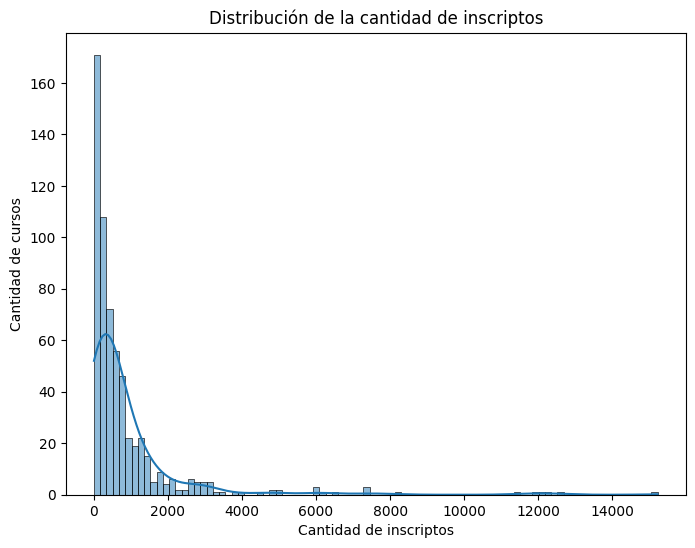

In [60]:
plt.figure(figsize=(8, 6))
sns.histplot(data=dfcour_insc, kde=True)
plt.title('Distribución de la cantidad de inscriptos')
plt.xlabel('Cantidad de inscriptos')
plt.ylabel('Cantidad de cursos')
plt.show()

### Rating

In [61]:
dfcour_rat = dfcour_v2.groupby(by="course_id")['rating'].mean().round(2) #se revisa el rating promedio de cada curso según la reseñas de cada usuario

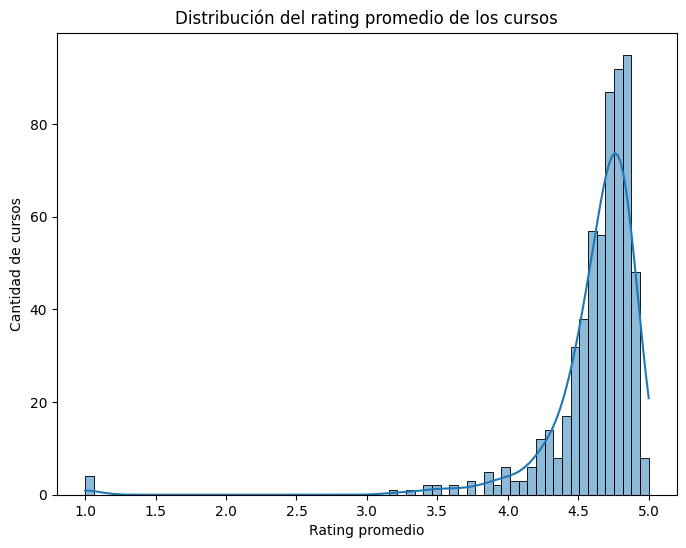

In [62]:
plt.figure(figsize=(8, 6))
sns.histplot(data=dfcour_rat, kde=True)
plt.title('Distribución del rating promedio de los cursos')
plt.xlabel('Rating promedio')
plt.ylabel('Cantidad de cursos')
plt.show()

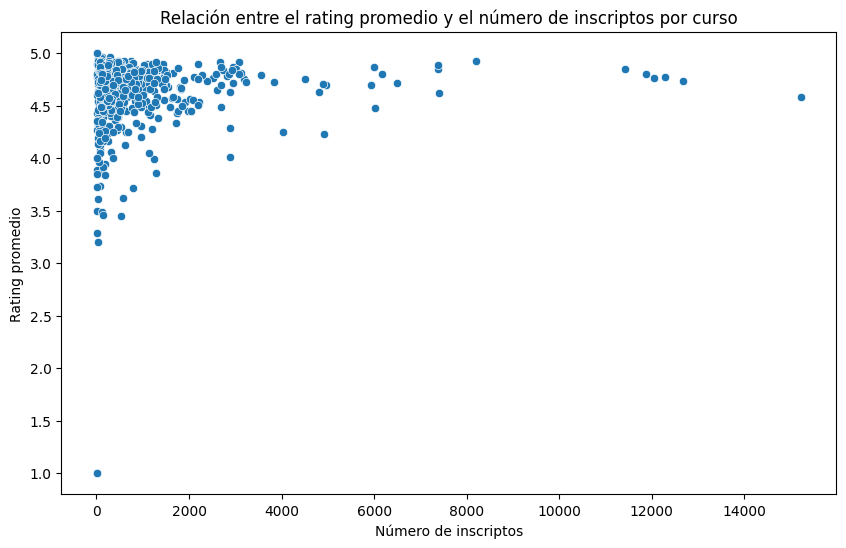

In [63]:
# Se agrupan los datos por 'course_id' y se calcula el rating promedio y el tamaño de cada grupo (como proxy de la cantidad de inscriptos)
dfcour_grouped = dfcour_v2.groupby('course_id').agg({'rating':'mean', 'name':'count'}).reset_index()

# se renombran las columnas para mayor claridad
dfcour_grouped = dfcour_grouped.rename(columns={'rating':'rating_promedio', 'name':'numero_inscriptos'})

# Creamos un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfcour_grouped, x='numero_inscriptos', y='rating_promedio')
plt.title('Relación entre el rating promedio y el número de inscriptos por curso')
plt.xlabel('Número de inscriptos')
plt.ylabel('Rating promedio')
plt.show()

In [64]:
dfcour_grouped[['rating_promedio', 'numero_inscriptos']].corr() #se calcula la correlación entre las 2 variables

,rating_promedio,numero_inscriptos
rating_promedio,1.000000,0.094435
numero_inscriptos,0.094435,1.000000


### Fecha de reseñas

In [65]:
resenias_x_anio  = dfcour_v2.groupby('review_year').size() # se agrupan las reseñas por año

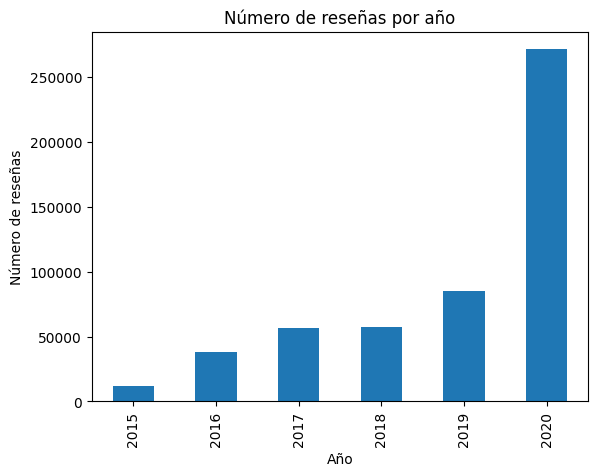

In [66]:
resenias_x_anio.plot(kind='bar')
plt.title('Número de reseñas por año')
plt.xlabel('Año')
plt.ylabel('Número de reseñas')
plt.show()

El número de reseñas aumentó considerablemente en el año 2020, lo cual coincide con el contexto de aislamiento por la pandemia COVID-19. Lo cual da una idea aproximada de la cantidad de inscriptos. De todos modos, para el objetivo de este proyecto, aportaría información adicional relevante la variación a lo largo del tiempo de la cantidad de inscriptos desde la fecha de lanzamiento del curso.

In [67]:
avg_rating_per_year = dfcour_v2.groupby('review_year')['rating'].mean() #rating promedio por año

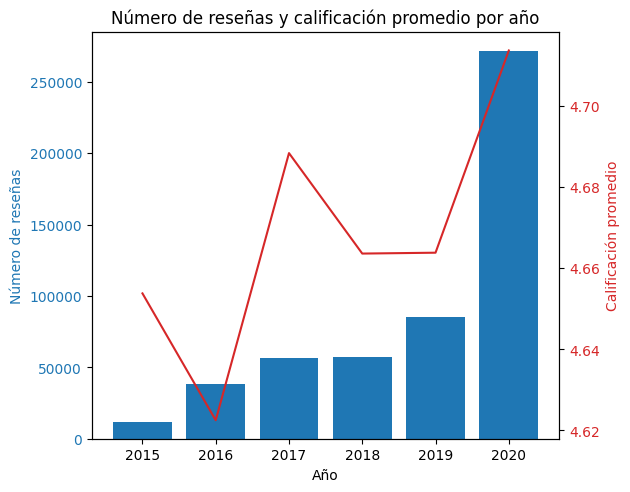

In [68]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('Número de reseñas', color=color)
ax1.bar(resenias_x_anio.index, resenias_x_anio, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Calificación promedio', color=color)
ax2.plot(avg_rating_per_year.index, avg_rating_per_year, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Número de reseñas y calificación promedio por año')
plt.show()


In [69]:
# se crea una copia del df para no modificar el original
df_copy = dfcour_v2.copy()

# se agrupan las reseñas por año y rating, y cuenta el número de reseñas en cada grupo
grouped_reviews = df_copy.groupby(['review_year', 'rating']).size().unstack(fill_value=0)

In [70]:
# se calculan las proporciones
proportions = grouped_reviews.apply(lambda x: x / x.sum(), axis=1)

# se imprimen las proporciones
print(proportions)


rating              1         2         3         4         5
review_year                                                  
2015         0.011948  0.012814  0.035758  0.188485  0.750996
2016         0.016784  0.015155  0.042602  0.179734  0.745725
2017         0.010190  0.011391  0.033960  0.168759  0.775700
2018         0.011886  0.012844  0.040031  0.170268  0.764970
2019         0.013975  0.013340  0.040443  0.159387  0.772854
2020         0.012535  0.010426  0.029631  0.145607  0.801801


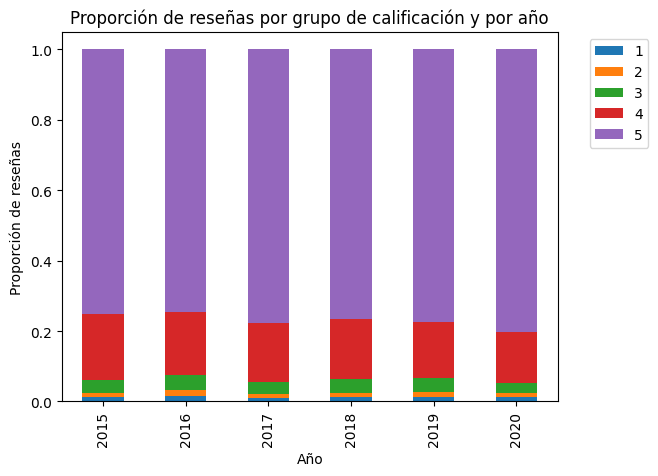

In [71]:
# se calcula el total de reseñas por año
total_resenias_x_anio = df_copy.groupby('review_year')['reviews'].count()

# se calcula el conteo de reseñas por grupo de calificación y por año
resenias_x_anio_and_group = df_copy.groupby(['review_year', 'rating'])['reviews'].count()

# Normalizar los conteos por el total de reseñas por año
normalized_reviews = resenias_x_anio_and_group / total_resenias_x_anio

# Desagrupar y convertir el resultado a un DataFrame
normalized_reviews_df = normalized_reviews.reset_index()
normalized_reviews_df.columns = ['Año', 'Grupo de calificación', 'Proporción de reseñas']

# se pivotean los datos para que cada columna represente un grupo de calificación
pivot_df = normalized_reviews_df.pivot(index='Año', columns='Grupo de calificación', values='Proporción de reseñas')

# se grafican las proporciones
ax = pivot_df.plot(kind='bar', stacked=True)
plt.title('Proporción de reseñas por grupo de calificación y por año')
plt.xlabel('Año')
plt.ylabel('Proporción de reseñas')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


No se observan grandes variaciones respecto a las proporciones de cada calificación en cada año.

### Institución

In [72]:
# se calcula la cantidad de cursos que cada institución ofrece
cursos_x_inst = df_copy['course_id'].groupby(df_copy['institution']).nunique()

# se calcula la cantidad de reseñas que cada institución tiene
resenias_x_inst = df_copy['reviews'].groupby(df_copy['institution']).count()

# se calcula el promedio de reseñas por curso de cada institución
normalized_resenias_x_inst = resenias_x_inst / cursos_x_inst

# se convierte a DataFrame para facilitar su manipulación y visualización
normalized_resenias_x_inst_df = normalized_resenias_x_inst.reset_index()
normalized_resenias_x_inst_df.columns = ['Institución', 'Reseñas Normalizadas por Cursos']

# se ordena el DataFrame por el número de reseñas promedio para que el gráfico sea más fácil de interpretar
normalized_resenias_x_inst_df.sort_values(by='Reseñas Normalizadas por Cursos', ascending=False, inplace=True)


In [73]:
normalized_resenias_x_inst_df

,Institución,Reseñas Normalizadas por Cursos
129,Yonsei University,3594.000000
57,Peking University,3549.000000
28,Google,2992.555556
47,McMaster University,2727.000000
16,DeepLearning.AI,2520.187500
...,...,...
29,Google - Spectrum Sharing,33.000000
58,Peter the Great St. Petersburg Polytechnic Uni...,33.000000
115,University of New Mexico,6.000000
27,GitLab,5.000000


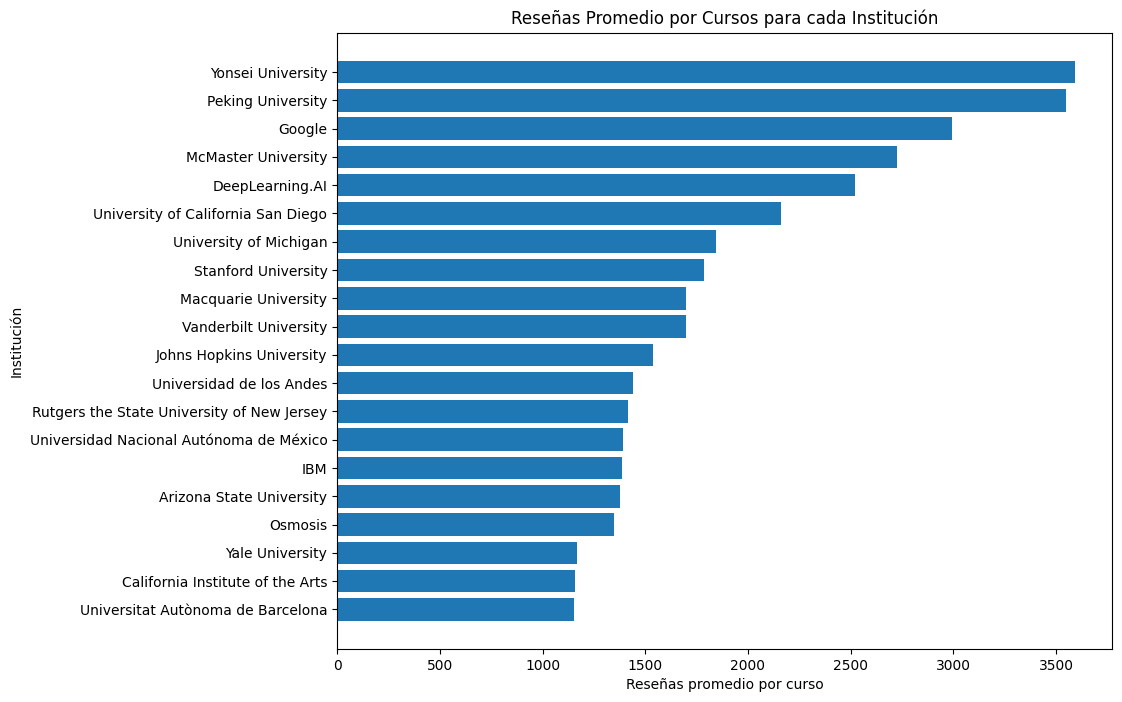

In [74]:
normalized_resenias_x_inst_df = normalized_resenias_x_inst_df.head(20) # se toman solamente las instituciones con mayor cantidad de reseñas promedio

plt.figure(figsize=(10,8))
plt.barh(normalized_resenias_x_inst_df['Institución'], normalized_resenias_x_inst_df['Reseñas Normalizadas por Cursos'])
plt.xlabel('Reseñas promedio por curso')
plt.ylabel('Institución')
plt.title('Reseñas Promedio por Cursos para cada Institución')
plt.gca().invert_yaxis()  # invertir el eje y para que la institución con la mayor cantidad de reseñas esté en la parte superior
plt.show()


Las instituciones con mayor cantidad de inscriptos por curso son principalmente universidades.

# 3.2 EdX

In [75]:
dfedx.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price_str', 'course_description',
       'course_syllabus', 'course_url', 'language_0', 'price'],
      dtype='object')

### Idioma

In [76]:
dfedx_lang = dfedx.groupby(by="language").size()
dfedx_lang

language
Alemán         1
Chino          4
Español      176
Francés        7
Inglés       776
Italiano       4
Japonés        1
Portugués      4
Árabe          1
dtype: int64

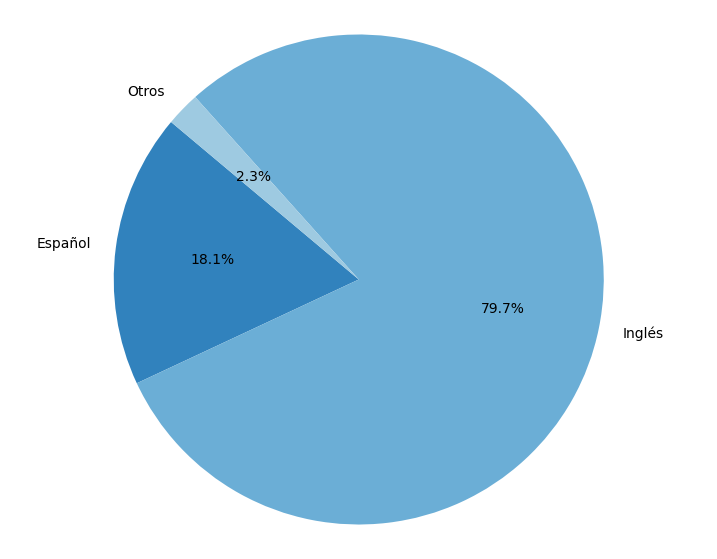

In [77]:
# se calcula la frecuencia relativa porcentual de cada idioma
dfedx_lang_percents = dfedx_lang / dfedx_lang.sum() * 100

dfedx_lang_grouped = dfedx_lang.copy() # se crea una nueva Serie donde los idiomas con un porcentaje menor al 3% se agrupan como 'Otros'
dfedx_lang_grouped[dfedx_lang_percents < 1] = -1  # se asigna un valor temporal a los idiomas con un porcentaje menor al 3%
dfedx_lang_grouped = dfedx_lang_grouped[dfedx_lang_grouped != -1]  # se eliminan esos idiomas
dfedx_lang_grouped['Otros'] = dfedx_lang[dfedx_lang_percents < 1].sum()  # se añade una nueva categoría 'Otros'

# se crea el gráfico de torta
labels = dfedx_lang_grouped.index
sizes = dfedx_lang_grouped.values
colors = plt.cm.tab20c.colors

plt.figure(figsize=(9,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

Respecto a la oferta de cursos, se observa una mayoría muy importante de cursos en inglés, seguido por cursos en español y en una proporción mucho menor el resto de los idiomas.

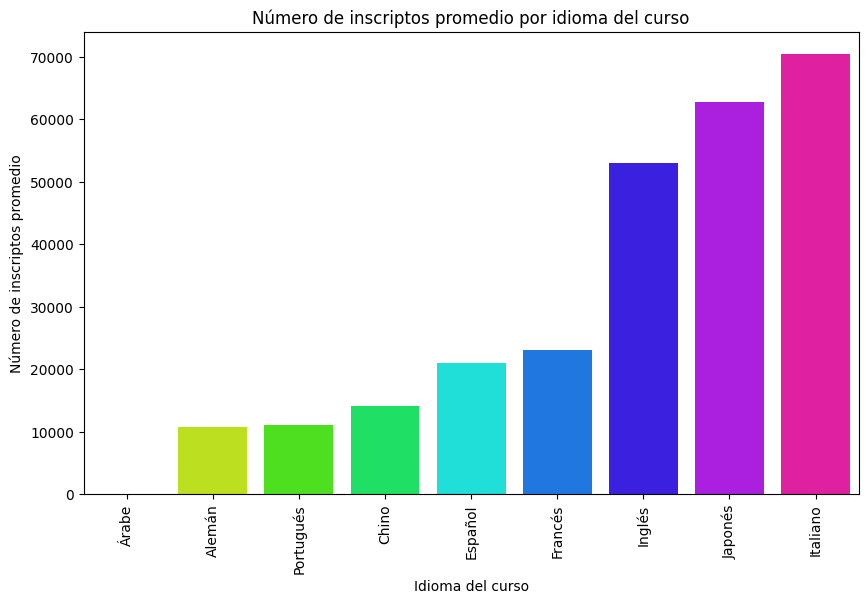

In [78]:
dfedx_grouped = dfedx.groupby('language').agg({'n_enrolled':'mean'}).reset_index() # Se agrupan los datos por 'language' y se calcula el promedio de inscriptos

dfedx_grouped = dfedx_grouped.rename(columns={'n_enrolled':'numero_inscriptos_promedio'}) # se renombran las columnas para mayor claridad

dfedx_grouped = dfedx_grouped.sort_values(by='numero_inscriptos_promedio') # se ordenan los grupos

plt.figure(figsize=(10, 6)) # se crea el gráfico
sns.set_palette("pastel") # se establece la paleta de colores

sns.barplot(x=dfedx_grouped.language, y=dfedx_grouped.numero_inscriptos_promedio, palette="hsv") # se usa el método 'barplot' de seaborn

# se definen etiquetas del gráfico
plt.title('Número de inscriptos promedio por idioma del curso')
plt.xlabel('Idioma del curso')
plt.ylabel('Número de inscriptos promedio')
plt.xticks(rotation=90) # rotar las etiquetas del eje x para que sean legibles

# se muestra el gráfico
plt.show()

Al analizar la cantidad de inscriptos según el idioma del curso, se destaca que en promedio los cursos en italiano y japones tienen mayor cantidad de inscriptos.

### Nivel
Se analiza la relación del nivel de los cursos que ofrece esta plataforma con la cantidad de inscriptos.

In [79]:
dfedx_grouped = dfedx.groupby('Level').agg({'n_enrolled':'mean'}).reset_index() # Se agrupan los datos por 'nivel' y se calcula el total de inscriptos
dfedx_grouped

,Level,n_enrolled
0,Advanced,34471.505747
1,Intermediate,37826.492481
2,Introductory,52140.806763


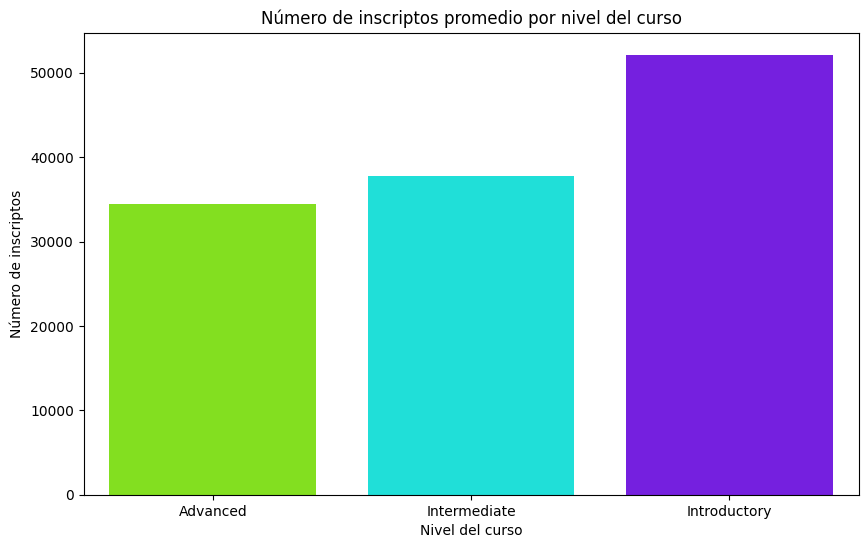

In [80]:
dfedx_grouped = dfedx_grouped.rename(columns={'n_enrolled':'numero_inscriptos_promedio'}) # se renombran las columnas para mayor claridad

dfedx_grouped = dfedx_grouped.sort_values(by='numero_inscriptos_promedio') # se ordenan los grupos

plt.figure(figsize=(10, 6)) # se crea el gráfico
sns.set_palette("pastel") # se establece la paleta de colores

sns.barplot(x=dfedx_grouped.Level, y=dfedx_grouped.numero_inscriptos_promedio, palette="hsv") # se usa el método 'barplot' de seaborn

# se definen etiquetas del gráfico
plt.title('Número de inscriptos promedio por nivel del curso')
plt.xlabel('Nivel del curso')
plt.ylabel('Número de inscriptos')

# se muestra el gráfico
plt.show()

Para esta variable también se encuentra una diferencia clara entre las categorías. Los cursos de nivel introductorio tienen una mayor cantidad de inscriptos promedio que los cursos más avanzados.

### Precio

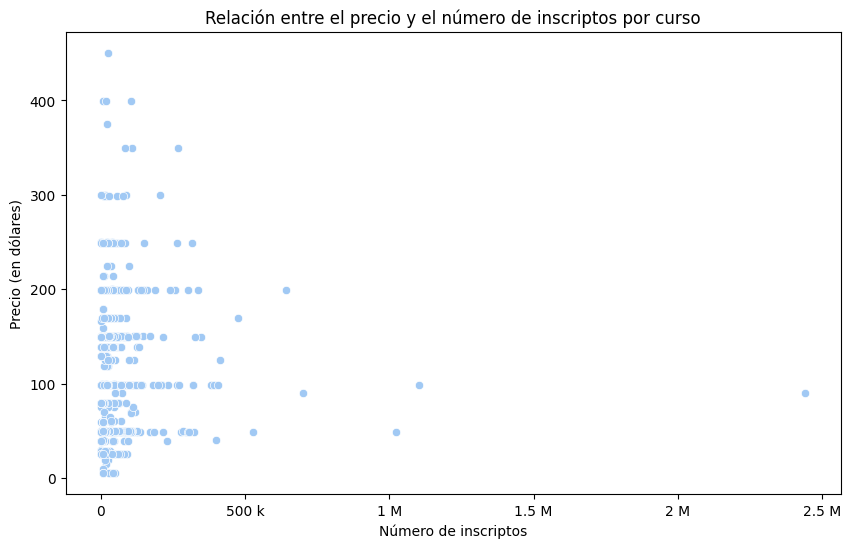

In [81]:
# Creamos un scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=dfedx, x='n_enrolled', y='price', ax=ax)

# Se modifican los ticks del eje x
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.title('Relación entre el precio y el número de inscriptos por curso')
plt.xlabel('Número de inscriptos')
plt.ylabel('Precio (en dólares)')
plt.show()

In [82]:
dfedx[['price', 'n_enrolled']].corr() #se calcula la correlación entre las 2 variables

,price,n_enrolled
price,1.000000,0.051293
n_enrolled,0.051293,1.000000


Los cursos con más de 1 millón de inscriptos no superan el precio de 100 dólares. Cabe aclarar que en esta plataforma el precio corresponde a la expedición del certificado del curso, ya que es posible acceder al material y a las grabaciones de las clases de forma gratuita.

### Nombres, descripciones y resúmenes

Se analiza la frecuencia de palabras tanto en el nombre del curso como en sus descripciones y resúmenes utilizando la librería *worldcloud* para generar las nubes de palabras cuyos tamaños dependerán de su abundancia respectiva.
Se separan los cursos en dos grupos en función a la cantidad de inscriptos con el objetivo de identificar palabras que puedan ser representativas de cada grupo.

In [83]:
dfedx[(dfedx.language == "Español")].n_enrolled.describe() #se revisan los valores del percentil 75%

count       176.000000
mean      21050.994318
std       35953.262292
min           0.000000
25%        6336.250000
50%       12711.000000
75%       23040.000000
max      306286.000000
Name: n_enrolled, dtype: float64

In [84]:
dfedx[(dfedx.language == "Inglés")].n_enrolled.describe() #se revisan los valores del percentil 75%

count    7.760000e+02
mean     5.298751e+04
std      1.243509e+05
min      0.000000e+00
25%      9.464000e+03
50%      2.311950e+04
75%      5.524425e+04
max      2.442271e+06
Name: n_enrolled, dtype: float64

Idioma español

In [85]:
# Se descargan las stopwords del NLTK si no se tienen ya
nltk.download('stopwords')

# Se definen las stopwords
stop_words = set(stopwords.words('spanish'))

# Se asegura que las stopwords sean ignoradas en la nube de palabras
stopwords = set(STOPWORDS)
stopwords.update(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
stopwords.add('cómo')
stopwords.add('curso')

Cursos sin inscriptos

In [87]:
summary_text = ' '.join(dfedx.loc[(dfedx.language == "Español") & (dfedx.n_enrolled == 0),'summary'].dropna().astype(str))
descrip_text = ' '.join(dfedx.loc[(dfedx.language == "Español") & (dfedx.n_enrolled == 0),'course_description'].dropna().astype(str))
title_text = ' '.join(dfedx.loc[(dfedx.language == "Español") & (dfedx.n_enrolled == 0),'title'].dropna().astype(str))

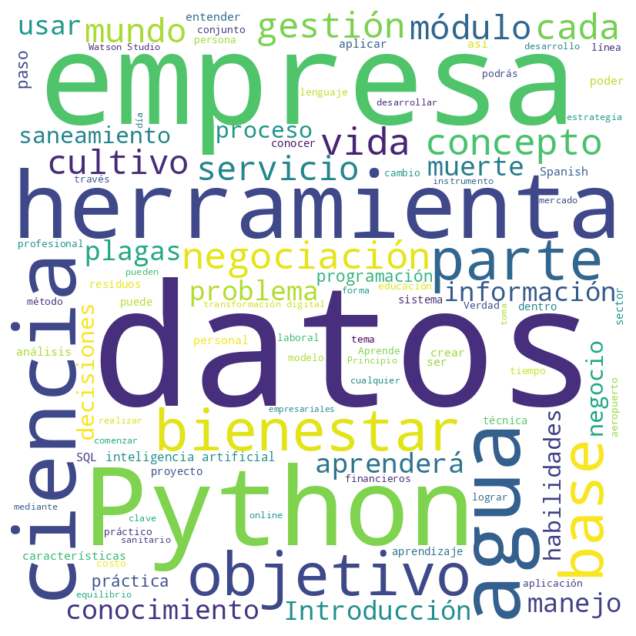

In [88]:
# Se concatenan las columnas de texto, asegurándose de que sean strings
text = ''.join(summary_text + ' ' +
                title_text + ' ' +
                descrip_text)

# Se crea la nube de palabras
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                      width=800, height=800, max_words=100).generate(text)

# Se visualiza la nube de palabras
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Palabra principales: "datos", "empresa", "python", "herramienta" y "ciencia".

Cursos con más inscriptos
Para este grupo se consideraron los cursos ubicados a partir del percentil 75.

In [89]:
summary_text = ' '.join(dfedx.loc[(dfedx.language == "Español") & (dfedx.n_enrolled >23040),'summary'].dropna().astype(str))
descrip_text = ' '.join(dfedx.loc[(dfedx.language == "Español") & (dfedx.n_enrolled >23040),'course_description'].dropna().astype(str))
title_text = ' '.join(dfedx.loc[(dfedx.language == "Español") & (dfedx.n_enrolled >23040),'title'].dropna().astype(str))

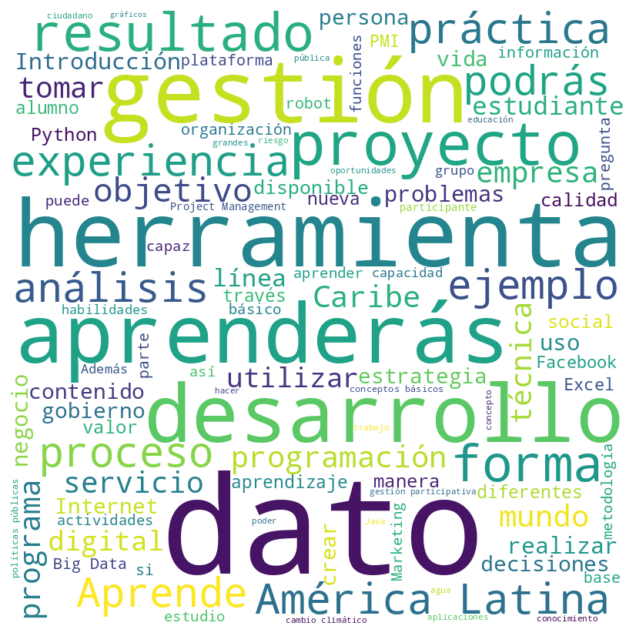

In [90]:
# Se concatenan las columnas de texto, asegurándose de que sean strings
text = ''.join(summary_text + ' ' +
                title_text + ' ' +
                descrip_text)

# Se crea la nube de palabras
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                      width=800, height=800, max_words=100).generate(text)

# Se visualiza la nube de palabras
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Palabra principales a diferencia del grupo anterior: "gestión", "proyecto" y "desarrollo".

Idioma inglés

In [91]:
stopwords.add('will')
stopwords.add('s')
stopwords.add('course')

Cursos sin inscriptos

In [92]:
summary_text = ' '.join(dfedx.loc[(dfedx.language == "Inglés") & (dfedx.n_enrolled == 0),'summary'].dropna().astype(str))
descrip_text = ' '.join(dfedx.loc[(dfedx.language == "Inglés") & (dfedx.n_enrolled == 0),'course_description'].dropna().astype(str))
title_text = ' '.join(dfedx.loc[(dfedx.language == "Inglés") & (dfedx.n_enrolled == 0),'title'].dropna().astype(str))

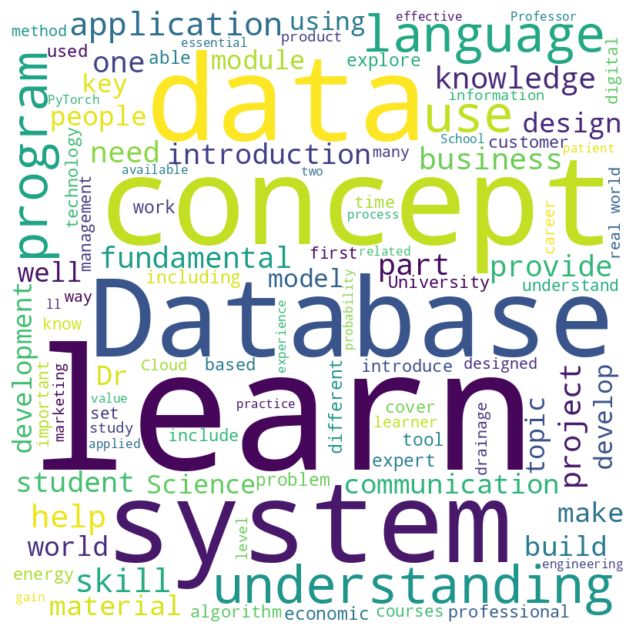

In [93]:
# Se concatenan las columnas de texto, asegurándose de que sean strings
text = ''.join(summary_text + ' ' +
                title_text + ' ' +
                descrip_text)

# Se crea la nube de palabras
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                      width=800, height=800, max_words=100).generate(text)

# Se visualiza la nube de palabras
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Palabra principales: "learn", "concept", "data", "system" y "database".

Cursos con más inscriptos
Para este grupo se consideraron los cursos ubicados a partir del percentil 75.

In [94]:
summary_text = ' '.join(dfedx.loc[(dfedx.language == "Inglés") & (dfedx.n_enrolled > 5.524425e+04),'summary'].dropna().astype(str))
descrip_text = ' '.join(dfedx.loc[(dfedx.language == "Inglés") & (dfedx.n_enrolled > 5.524425e+04),'course_description'].dropna().astype(str))
title_text = ' '.join(dfedx.loc[(dfedx.language == "Inglés") & (dfedx.n_enrolled > 5.524425e+04),'title'].dropna().astype(str))

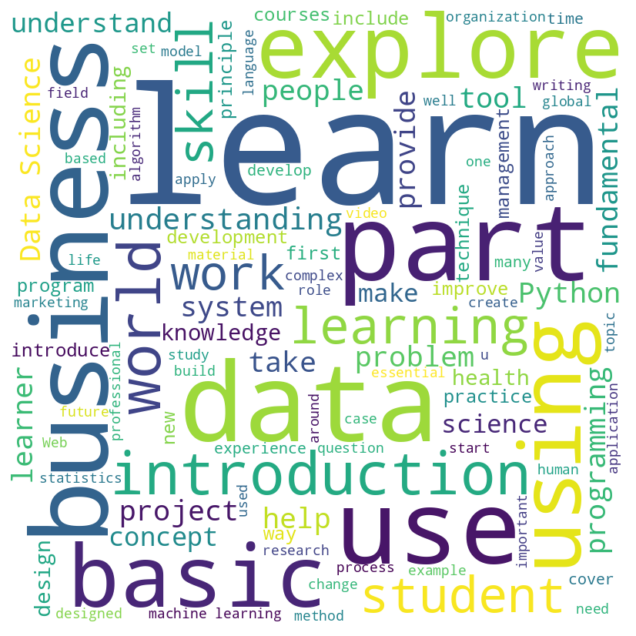

In [95]:
# Se concatenan las columnas de texto, asegurándose de que sean strings
text = ''.join(summary_text + ' ' +
                title_text + ' ' +
                descrip_text)

# Se crea la nube de palabras
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                      width=800, height=800, max_words=100).generate(text)

# Se visualiza la nube de palabras
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Palabra principales diferentes al otro grupo: "business", "basic", "explore" y "use".

### Institución

In [96]:
# se calcula la cantidad de cursos que cada institución ofrece
cursos_x_inst = dfedx['course_url'].groupby(dfedx['institution']).nunique()

# se calcula la cantidad de inscriptos que cada institución tiene
enrolled_per_institution = dfedx['n_enrolled'].groupby(dfedx['institution']).sum()

# se calcula el promedio de inscriptos por curso de cada institución
normalized_resenias_x_inst = resenias_x_inst / cursos_x_inst

# se convierte a DataFrame para facilitar su manipulación y visualización
normalized_resenias_x_inst_df = normalized_resenias_x_inst.reset_index()
normalized_resenias_x_inst_df.columns = ['Institución', 'Reseñas Normalizadas por Cursos']

# se ordena el DataFrame por el número de reseñas promedio para que el gráfico sea más fácil de interpretar
normalized_resenias_x_inst_df.sort_values(by='Reseñas Normalizadas por Cursos', ascending=False, inplace=True)


In [97]:
normalized_resenias_x_inst_df

,Institución,Reseñas Normalizadas por Cursos
204,University of Toronto,5651.000
200,University of Pennsylvania,3219.875
131,The University of Edinburgh,2074.000
112,Stanford University,1161.600
6,Arizona State University,919.000
...,...,...
224,Yonsei University,NaN
225,edX,NaN
226,École Polytechnique,NaN
227,École Polytechnique Fédérale de Lausanne,NaN


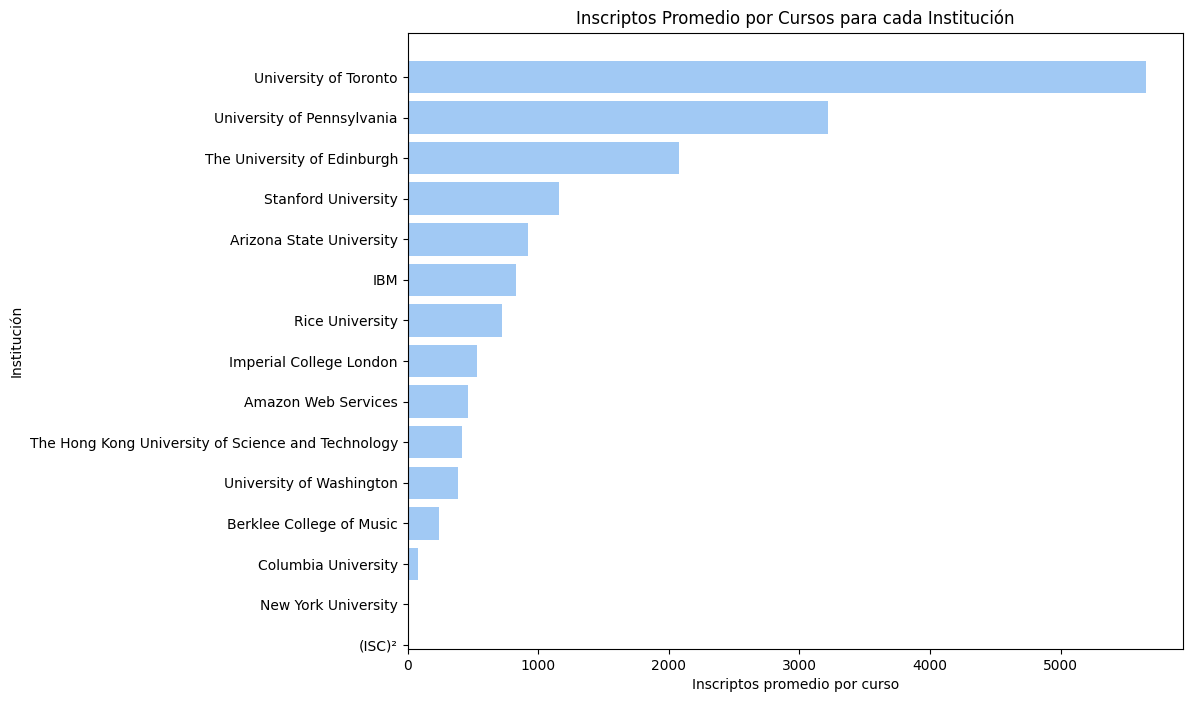

In [98]:
normalized_resenias_x_inst_df = normalized_resenias_x_inst_df.head(20) # se toman solamente las instituciones con mayor cantidad de reseñas promedio

plt.figure(figsize=(10,8))
plt.barh(normalized_resenias_x_inst_df['Institución'], normalized_resenias_x_inst_df['Reseñas Normalizadas por Cursos'])
plt.xlabel('Inscriptos promedio por curso')
plt.ylabel('Institución')
plt.title('Inscriptos Promedio por Cursos para cada Institución')
plt.gca().invert_yaxis()  # se invierte el eje y para que la institución con la mayor cantidad de reseñas esté en la parte superior
plt.show()

Se observa que la institución "Educational Testing Service" presenta una enorme cantidad de inscriptos promedio en sus cursos en comparación con todas las demás instituciones. Se revisa puntualmente este caso y se identifica un único curso correspondiente a la preparación para un examen internacional de inglés (*TOEFL*), el cual tiene una demanda que supera el millón de inscriptos, representando un caso excepcionalmente exitoso para esta plataforma.

In [99]:
dfedx[dfedx.institution == "Educational Testing Service"]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price_str,course_description,course_syllabus,course_url,language_0,price
31,TOEFL® Test Preparation: The Insider’s Guide,Prepare for the TOEFL® test and learn how to i...,1022489,Self-paced on your time,Educational Testing Service,"[Michael Knab, Cynthia Newman, Shawn Gorman, M...",Introductory,Communication,Inglés,English,2–4 hours per week,6 Weeks,FREE-Add a Verified Certificate for $49 USD,"This test preparation course, developed by the...",NaN,https://www.edx.org/course/toefl-test-preparat...,English,49.0


### Instructor

Se analiza la relación entre instructores y número de inscriptos. Esto permite conocer si algunos instructores se destacan en popularidad. Primero se revisa la cantidad total de inscriptos registrados en todos los cursos ofrecidos por cada instructor. En segundo término, se revisa la cantidad promedio de inscriptos por curso según cada instructor. El supuesto de este análisis es la ponderación equitativa en los casos de cursos brindados por más de un instructor. De esta forma no se distinguen instructores principales de secundarios, por ejemplo.

In [100]:
# se usa explode para dividir los instructores en filas separadas
df_exploded = dfedx.explode('instructors')

# se agrupa por instructor y se suma la cantidad de inscritos
instructor_success = df_exploded.groupby('instructors')['n_enrolled'].sum()

# se ordena de mayor a menor
instructor_success = instructor_success.sort_values(ascending=False)

print(instructor_success)

instructors
David J. Malan                   3956549
Brian Yu                         3399227
Doug Lloyd                       2529607
Rafael Irizarry                  2095650
Iain Mathieson                   1103777
                                  ...   
Maxime Raison                          0
Maxim Topaz                            0
Mauricio De Anda Hernández             0
María del Pilar Pérez Álvarez          0
ANDRES FELIPE VELASQUEZ                0
Name: n_enrolled, Length: 1556, dtype: int64


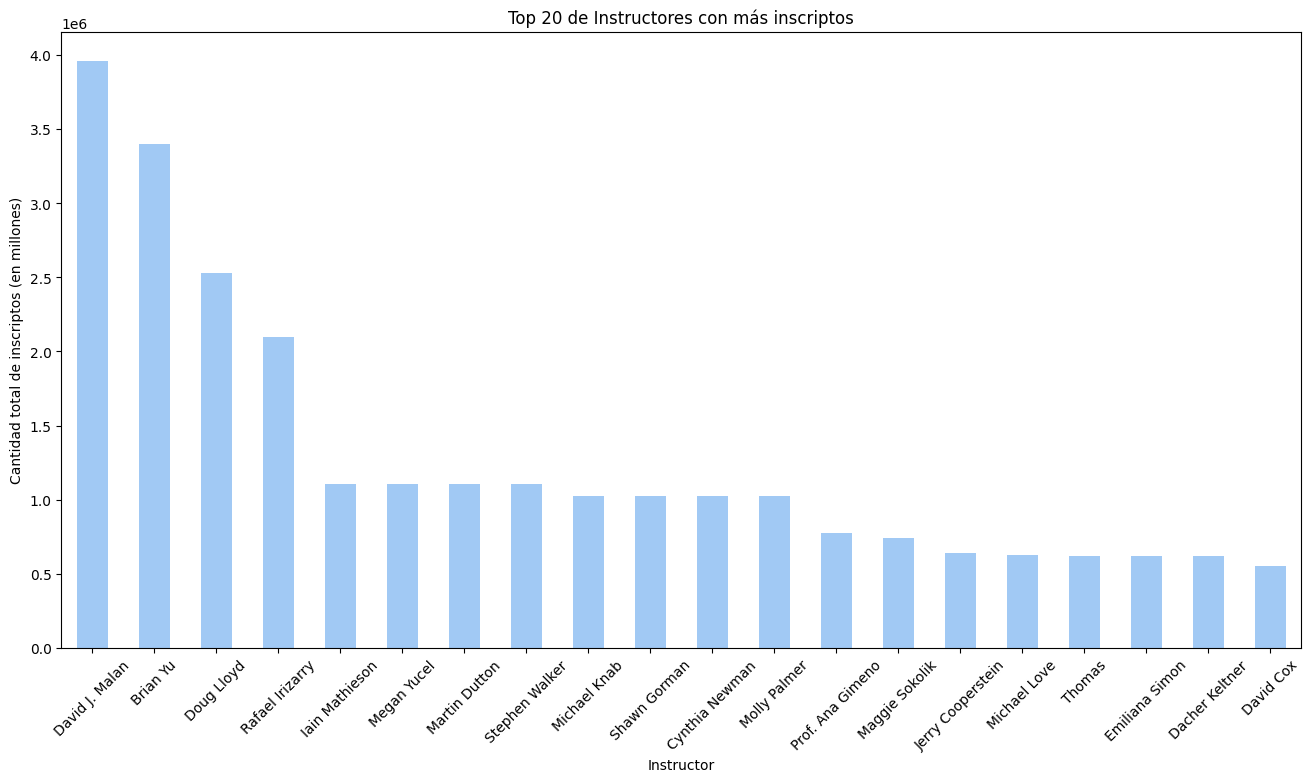

In [101]:
instructor_success = instructor_success.head(20) # se toman solamente los instructores con mayor cantidad de inscriptos

plt.figure(figsize=(16,8))
instructor_success.plot(kind='bar')
plt.xlabel('Instructor')
plt.ylabel('Cantidad total de inscriptos (en millones)')
plt.title('Top 20 de Instructores con más inscriptos')
plt.xticks(rotation=45)
plt.show()

Se observan instructores con diferencias de millones de inscriptos, por lo que puede considerarse como un variable importante para el éxito de un curso.

In [102]:
# se cuenta el número de cursos de cada instructor
course_count = dfedx.explode('instructors')['instructors'].value_counts()

# se agrupa por instructor y se suma la cantidad de inscritos
instructor_success = df_exploded.groupby('instructors')['n_enrolled'].sum()

# se calcula el número promedio de inscriptos por curso para cada instructor
average_enrollment = instructor_success / course_count

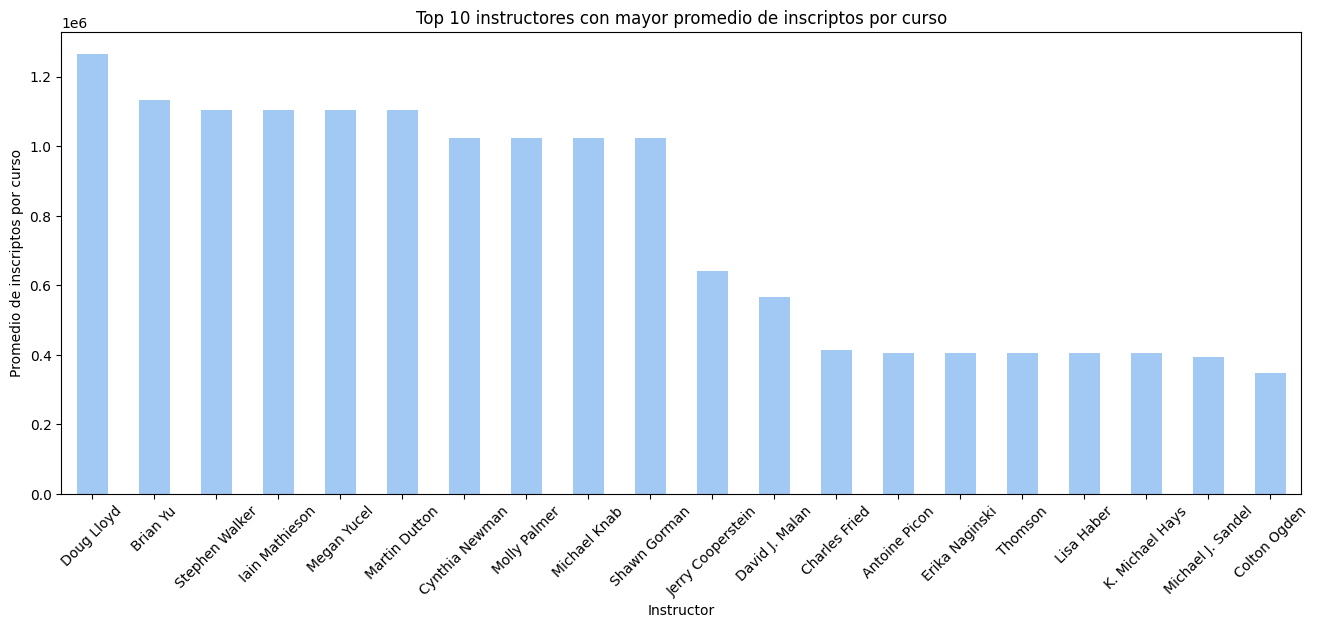

In [103]:
# se limita a los instructores con el promedio más alto de inscritos por curso
top_average_enrollment = average_enrollment.sort_values(ascending=False)[:20]

plt.figure(figsize=(16,6))
top_average_enrollment.plot(kind='bar')
plt.title('Top 10 instructores con mayor promedio de inscriptos por curso')
plt.xlabel('Instructor')
plt.ylabel('Promedio de inscriptos por curso')
plt.xticks(rotation=45)
plt.show()

Al observar el promedio por curso para cada instructor, se puede tener una idea más consistente del éxito de cada uno.

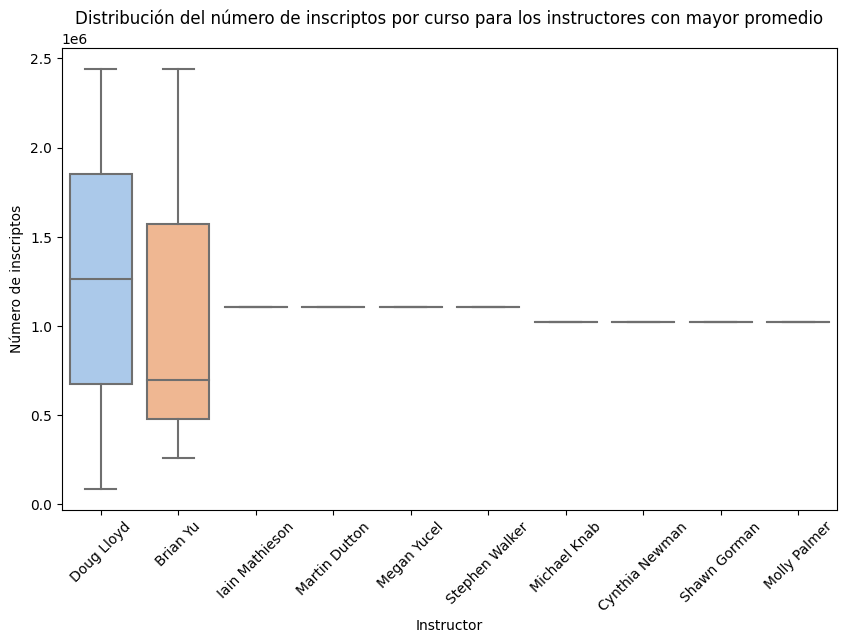

In [104]:
# Obtén los nombres de los instructores con el promedio más alto de inscriptos por curso
top_instructors = average_enrollment.sort_values(ascending=False).index[:10]

# Filtra el DataFrame original para incluir sólo los cursos impartidos por estos instructores
df_exploded = dfedx.explode('instructors')
df_filtered = df_exploded[df_exploded['instructors'].isin(top_instructors)]

# Crear un boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='instructors', y='n_enrolled', data=df_filtered)
plt.title('Distribución del número de inscriptos por curso para los instructores con mayor promedio')
plt.xlabel('Instructor')
plt.ylabel('Número de inscriptos')
plt.xticks(rotation=45)
plt.show()


# 3.3 Udemy

In [105]:
dfude.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3672 entries, 0 to 3677
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   course_id              3672 non-null   int64              
 1   course_title           3672 non-null   object             
 2   url                    3672 non-null   object             
 3   is_paid                3672 non-null   bool               
 4   price                  3672 non-null   int64              
 5   num_subscribers        3672 non-null   int64              
 6   num_reviews            3672 non-null   int64              
 7   num_lectures           3672 non-null   int64              
 8   level                  3672 non-null   object             
 9   content_duration       3672 non-null   float64            
 10  published_timestamp    3672 non-null   datetime64[ns, UTC]
 11  subject                3672 non-null   object           

### Nivel
Se analiza la relación del nivel de los cursos que ofrece esta plataforma con la cantidad de inscriptos.

In [106]:
dfude_grouped = dfude.groupby('level').agg({'num_subscribers':'mean'}).reset_index() # Se agrupan los datos por 'nivel' y se calcula el total de inscriptos
dfude_grouped

,level,num_subscribers
0,All Levels,3569.761558
1,Beginner Level,3195.459779
2,Expert Level,865.448276
3,Intermediate Level,1762.482185


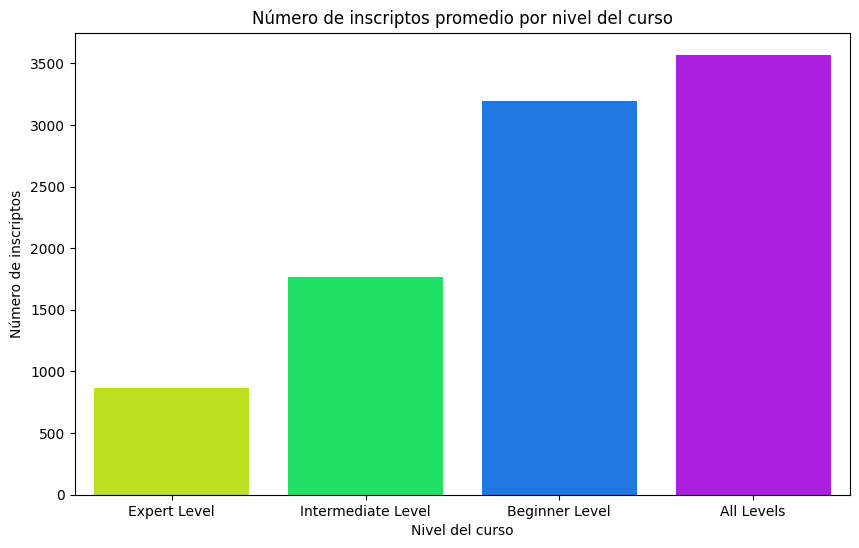

In [107]:
dfude_grouped = dfude_grouped.rename(columns={'num_subscribers':'numero_inscriptos_promedio'}) # se renombran las columnas para mayor claridad

dfude_grouped = dfude_grouped.sort_values(by='numero_inscriptos_promedio') # se ordenan los grupos

plt.figure(figsize=(10, 6)) # se crea el gráfico
sns.set_palette("pastel") # se establece la paleta de colores

sns.barplot(x=dfude_grouped.level, y=dfude_grouped.numero_inscriptos_promedio, palette="hsv") # se usa el método 'barplot' de seaborn

# se definen etiquetas del gráfico
plt.title('Número de inscriptos promedio por nivel del curso')
plt.xlabel('Nivel del curso')
plt.ylabel('Número de inscriptos')

# se muestra el gráfico
plt.show()

Se observa que los cursos de niveles introductorios o para todos los niveles, entendidos cómo los cursos que resultan más accessibles al público promedio sin conocimientos específicos en el tema, tienen una mayor cantidad de inscriptos. Esto resulta semenjante a lo hallado para la plataforma EdX.
Por este motivo, se considera como posible
métrica para incluir en un KPI la _tasa de conversión de inscripciones por nivel del curso_, calculada como el número de inscripciones en cursos de cada nivel como un porcentaje del número total de inscripciones. Esto permitirá ver qué niveles de curso son más populares entre los estudiantes.

###  Precio

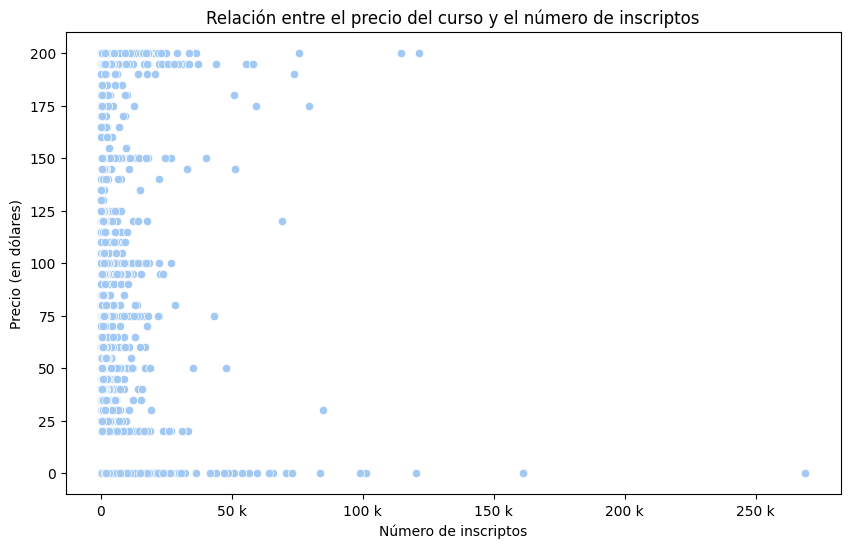

In [108]:
# Creamos un scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=dfude, x='num_subscribers', y='price', ax=ax)

# Se modifican los ticks del eje x
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.title('Relación entre el precio del curso y el número de inscriptos')
plt.xlabel('Número de inscriptos')
plt.ylabel('Precio (en dólares)')
plt.show()

Los cursos con la mayor cantidad de inscriptos son gratuitos, sin embargo también pueden no tener inscriptos. Si se consideran solo los cursos que son pagos, las mayores cantidades de inscriptos se observan en los cursos más costosos. De todos modos, se revisa si existe relación lineal entre las dos variables mediante el coeficiente de correlación de Pearson.

In [109]:
dfude.loc[dfude.is_paid==True, ['price', 'num_subscribers']].corr() #se calcula la correlación entre las 2 variables

,price,num_subscribers
price,1.000000,0.229508
num_subscribers,0.229508,1.000000


El coeficiente resulta bajo por lo que se entiende que no existe relación lineal entre las dos variables.

### Grupo temático

In [110]:
# se agregan los datos por 'subject', calculando el promedio de precio y la suma de inscriptos
grouped = dfude.groupby('subject').agg({'price':'mean', 'num_subscribers':'sum'}).reset_index()

fig = px.scatter(grouped,
                 x='subject',
                 y='price',
                 size='num_subscribers',
                 color='subject',
                 hover_name='subject',
                 size_max=60)

fig.update_layout(
    title="Cantidad de inscriptos por tema del curso",
    xaxis_title="Tema del curso",
    yaxis_title="Precio promedio del curso",
    legend_title="Tema",
)

fig.show()


Se puede observar que los cursos sobre desarrollo web cuentan una mayor cantidad de inscriptos y el precio promedio más alto. Resultaría relevante definir un KPI asociado al aumento de inscriptos en cursos de esta temática, cuyos precios podrían establecerse en valores más altos.

### Rating

In [111]:
dfude.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'instructors_id',
       'rating', 'title', 'display_name', 'job_title', 'subject_0',
       'published_timestamp_0', 'year_published', 'month_published',
       'day_published', 'dayofweek_published'],
      dtype='object')

In [112]:
dfude_rat = dfude.groupby(by="course_id")['rating'].mean().round(2) #se revisa el rating promedio de cada curso según la reseñas de cada usuario

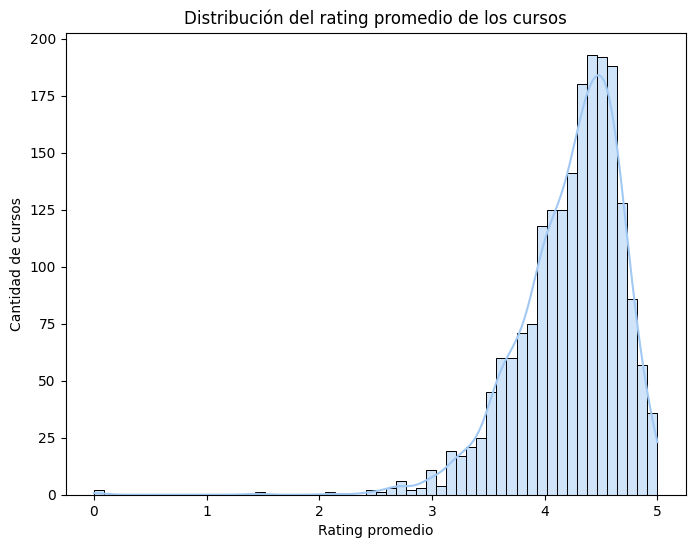

In [113]:
plt.figure(figsize=(8, 6))
sns.histplot(data=dfude_rat, kde=True)
plt.title('Distribución del rating promedio de los cursos')
plt.xlabel('Rating promedio')
plt.ylabel('Cantidad de cursos')
plt.show()

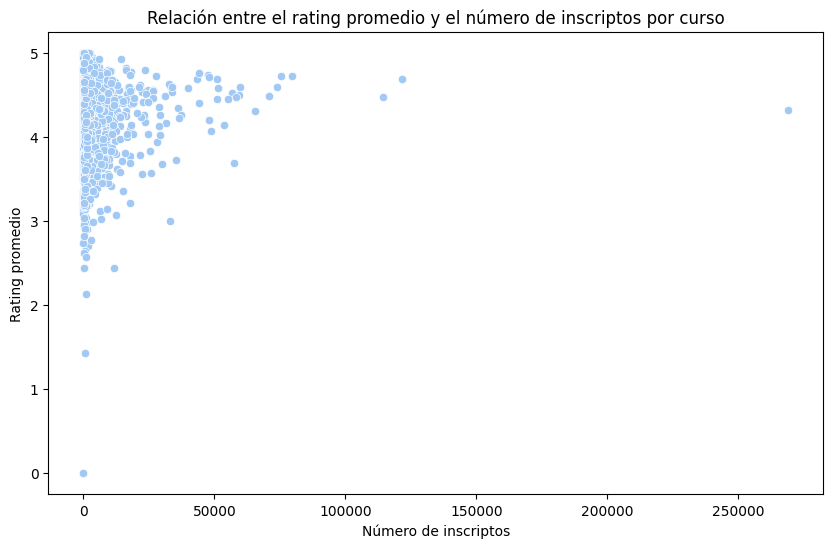

In [114]:
# # Se agrupan los datos por 'course_id' y se calcula el rating promedio y el tamaño de cada grupo (como proxy de la cantidad de inscriptos)
# dfcour_grouped = dfcour_v2.groupby('course_id').agg({'rating':'mean', 'name':'count'}).reset_index()

# # se renombran las columnas para mayor claridad
# dfcour_grouped = dfcour_grouped.rename(columns={'rating':'rating_promedio', 'name':'numero_inscriptos'})

# Creamos un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfude, x='num_subscribers', y='rating')
plt.title('Relación entre el rating promedio y el número de inscriptos por curso')
plt.xlabel('Número de inscriptos')
plt.ylabel('Rating promedio')
plt.show()

In [115]:
dfude[['rating', 'num_subscribers']].corr() #se calcula la correlación entre las 2 variables

,rating,num_subscribers
rating,1.000000,0.056531
num_subscribers,0.056531,1.000000


Tampoco para este dataset se observa una clara relación lineal entre el rating de un curso y el número de inscriptos.

### Instructor

Se analiza la relación entre instructores y número de inscriptos tal como se hizo para el dataset de EdX. Esto permite conocer si algunos instructores se destacan en popularidad. Primero se revisa la cantidad total de inscriptos registrados en todos los cursos ofrecidos por cada instructor. En segundo término, se revisa la cantidad promedio de inscriptos por curso según cada instructor.

In [116]:
# se usa explode para dividir los instructores en filas separadas
df_exploded = dfude.explode('display_name')

# se agrupa por instructor y se suma la cantidad de inscritos
instructor_success = df_exploded.groupby('display_name')['num_subscribers'].sum()

# se ordena de mayor a menor
instructor_success = instructor_success.sort_values(ascending=False)

print(instructor_success)

display_name
Eduonix Learning Solutions    557737
Laurence Svekis               404725
Joe Parys                     291572
Anthony Alicea                197181
Rob Percival                  174810
                               ...  
Helen Bradley                      0
Andrii Pogorilyi                   0
Thomas Daniel                      0
Debi Peverill                      0
Monika Khetan                      0
Name: num_subscribers, Length: 957, dtype: int64


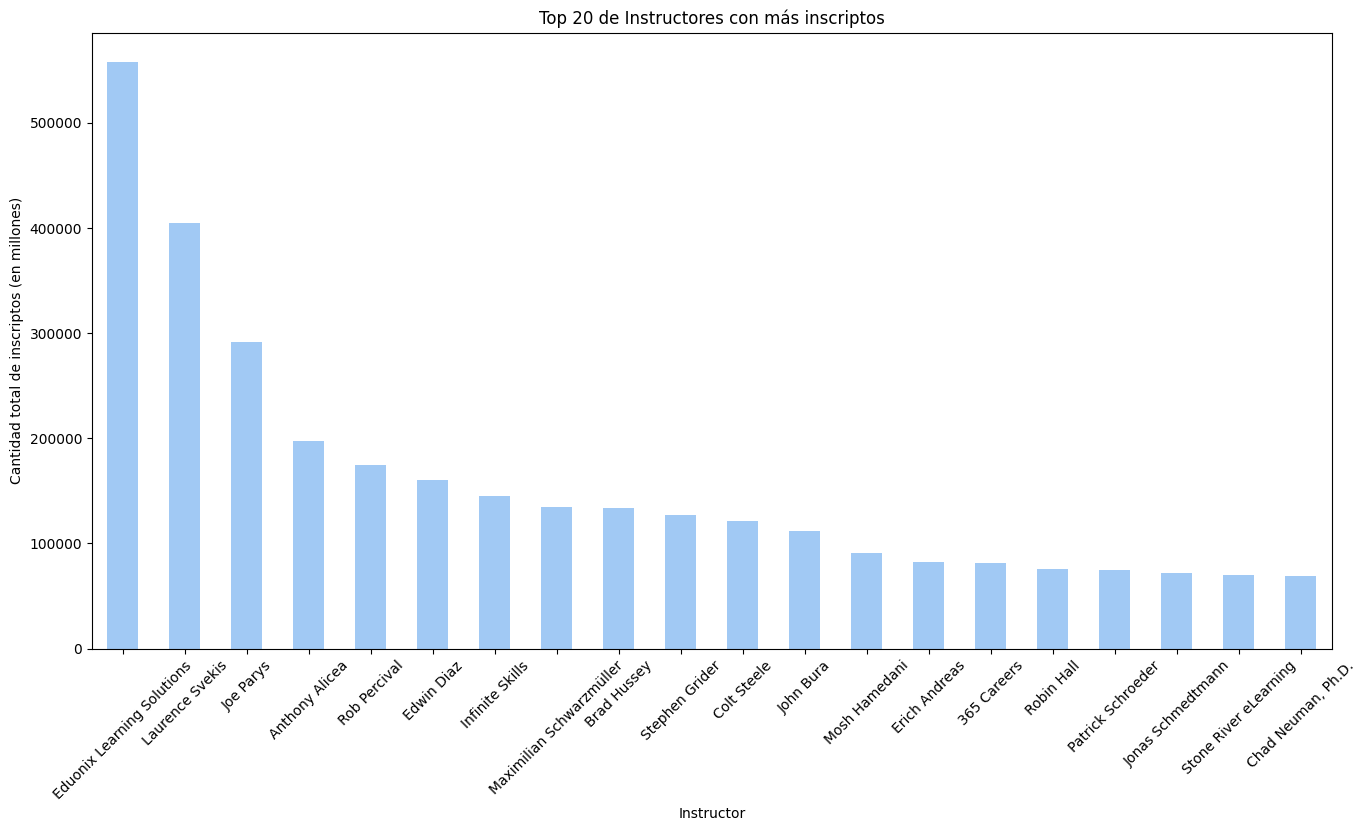

In [117]:
instructor_success = instructor_success.head(20) # se toman solamente los instructores con mayor cantidad de inscriptos

plt.figure(figsize=(16,8))
instructor_success.plot(kind='bar')
plt.xlabel('Instructor')
plt.ylabel('Cantidad total de inscriptos (en millones)')
plt.title('Top 20 de Instructores con más inscriptos')
plt.xticks(rotation=45)
plt.show()

Si bien las diferencias no se encuentran en el orden de cientos de miles de inscriptos como sucedía en el dataset de EdX, se destacan instructores más populares.

In [118]:
# se cuenta el número de cursos de cada instructor
course_count = dfude.explode('display_name')['display_name'].value_counts()

# se agrupa por instructor y se suma la cantidad de inscritos
instructor_success = df_exploded.groupby('display_name')['num_subscribers'].sum()

# se calcula el número promedio de inscriptos por curso para cada instructor
average_enrollment = instructor_success / course_count

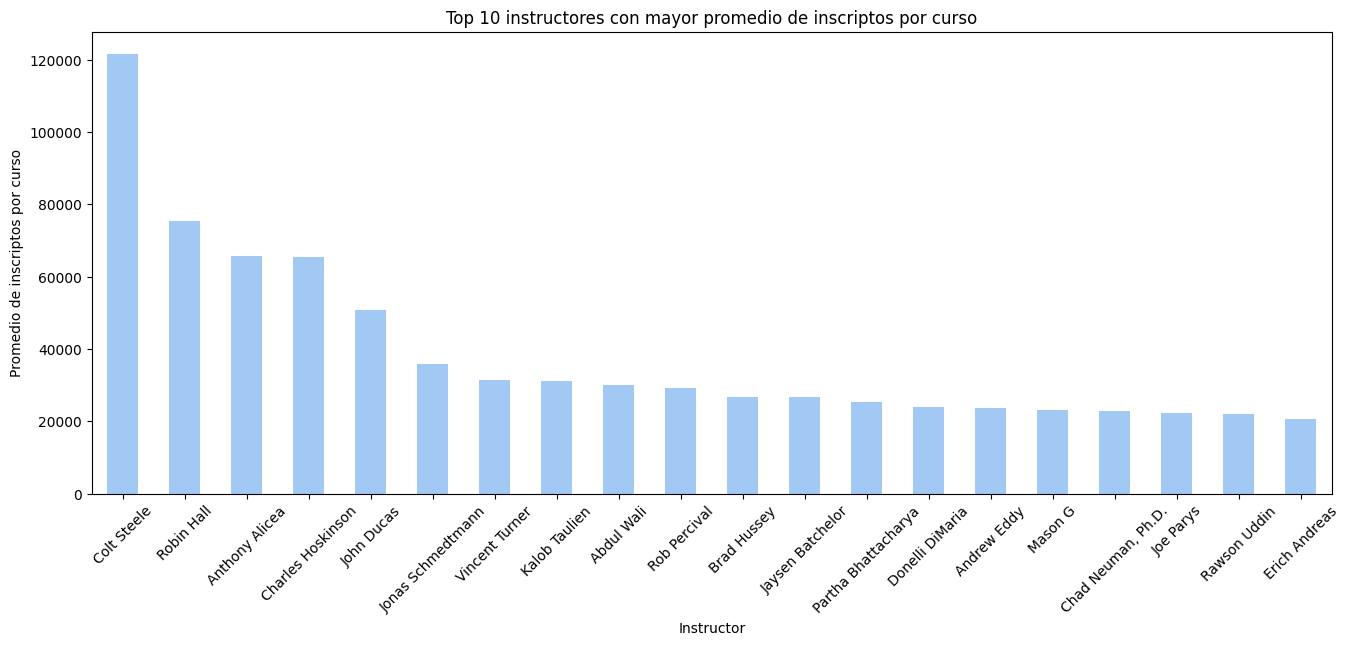

In [119]:
# se limita a los instructores con el promedio más alto de inscritos por curso
top_average_enrollment = average_enrollment.sort_values(ascending=False)[:20]

plt.figure(figsize=(16,6))
top_average_enrollment.plot(kind='bar')
plt.title('Top 10 instructores con mayor promedio de inscriptos por curso')
plt.xlabel('Instructor')
plt.ylabel('Promedio de inscriptos por curso')
plt.xticks(rotation=45)
plt.show()

Al observar el promedio por curso para cada instructor, el ranking cambia notablemente.

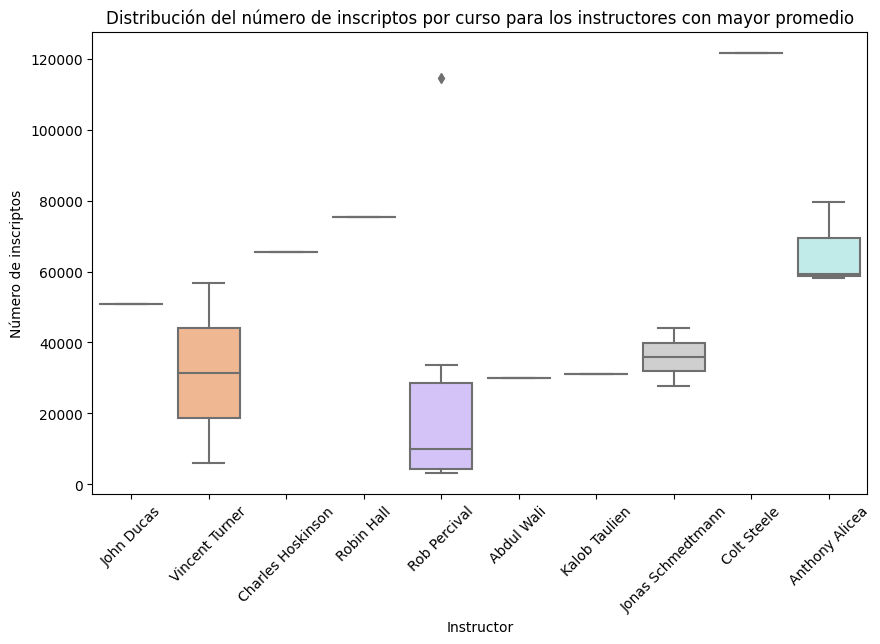

In [120]:
# Obtén los nombres de los instructores con el promedio más alto de inscriptos por curso
top_instructors = average_enrollment.sort_values(ascending=False).index[:10]

# Filtra el DataFrame original para incluir sólo los cursos impartidos por estos instructores
df_exploded = dfude.explode('display_name')
df_filtered = df_exploded[df_exploded['display_name'].isin(top_instructors)]

# Crear un boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='display_name', y='num_subscribers', data=df_filtered)
plt.title('Distribución del número de inscriptos por curso para los instructores con mayor promedio')
plt.xlabel('Instructor')
plt.ylabel('Número de inscriptos')
plt.xticks(rotation=45)
plt.show()

Entre los 5 instructores con mayor promedio de inscriptos por curso sólo uno ha realizado más de un curso ("Anthony Alicea"). Desarrollar y disponibilizar al menos un curso nuevo con alguno de estos instructores podría resultar muy favorable para el proyecto de plataforma. También puede presentar como un KPI.

### Modelo Random Forest: Importancia de variables

Con la intención de identificar la influencia de las variables sobre la cantidad de inscriptos (variable objetivo), se optó por un modelo de random forest con una configuración sencilla.

#### Correlación de variables

<ipython-input-121-6af23777a3a9>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



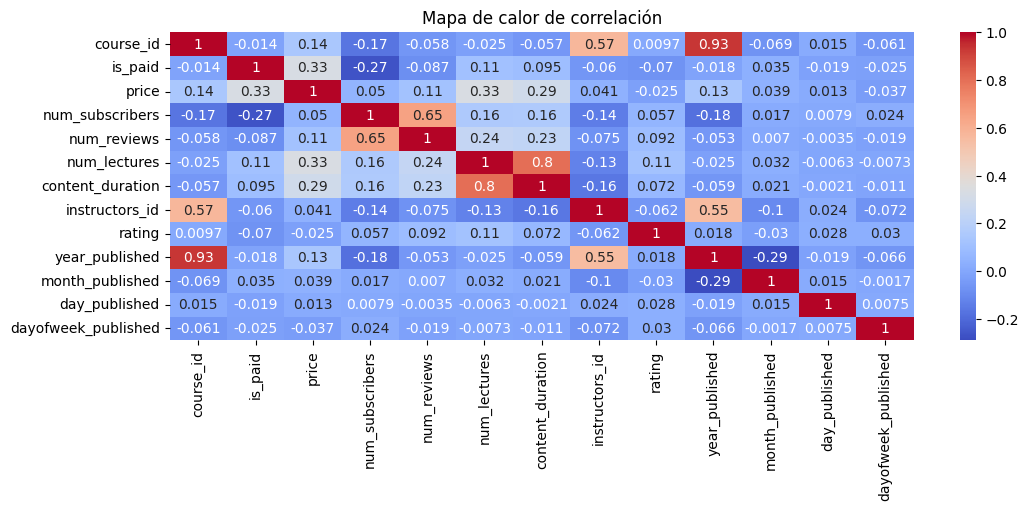

In [121]:
correlation_matrix = dfude.corr() #se calcula la correlación entre las 3 variables
plt.figure(figsize=(12, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') #se crea la visualización
plt.title('Mapa de calor de correlación')
plt.show()

Las correlaciones altas como "course_id" y "year_published" o bien "content_duration" y "num_lectures" permiten considerar la posibilidad de omitir del modelo a alguna de las dos variables ya que no aportarían información para el entrenamiento. Puntualmente, al observar la variable objetivo, se nota que no presenta una correlación clara con ninguna de las demás variables a excepción del número de reseñas ("num_reviews"), por lo que se optó por omitirla del modelo posterior.

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# se establecen las variables categóricas y las numéricas
# no se incluyen variables como "num_reviews" ya que es una variable muy correlacionada con la variable objetivo.
categorical = ['is_paid', 'level', 'subject']
numerical = ['price', 'content_duration', 'year_published', 'month_published', 'day_published']

# se realiza una codificación one-hot para variables categóricas
one_hot = OneHotEncoder()
transformer = make_column_transformer((one_hot, categorical), remainder='passthrough')

# se define el modelo
model = RandomForestRegressor(random_state=1)

# se crea un pipeline que primero transforma los datos y luego ajusta el modelo
pipe = make_pipeline(transformer, model)

# se definen las variables X e y
X = dfude[categorical + numerical]
y = dfude['num_subscribers']

# se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# se ajusta el modelo
pipe.fit(X_train, y_train)

# finalmente se obtienen las importancias de las características
importances = model.feature_importances_

In [123]:
dfude.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'instructors_id',
       'rating', 'title', 'display_name', 'job_title', 'subject_0',
       'published_timestamp_0', 'year_published', 'month_published',
       'day_published', 'dayofweek_published'],
      dtype='object')

In [124]:
dfude.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3672 entries, 0 to 3677
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   course_id              3672 non-null   int64              
 1   course_title           3672 non-null   object             
 2   url                    3672 non-null   object             
 3   is_paid                3672 non-null   bool               
 4   price                  3672 non-null   int64              
 5   num_subscribers        3672 non-null   int64              
 6   num_reviews            3672 non-null   int64              
 7   num_lectures           3672 non-null   int64              
 8   level                  3672 non-null   object             
 9   content_duration       3672 non-null   float64            
 10  published_timestamp    3672 non-null   datetime64[ns, UTC]
 11  subject                3672 non-null   object           

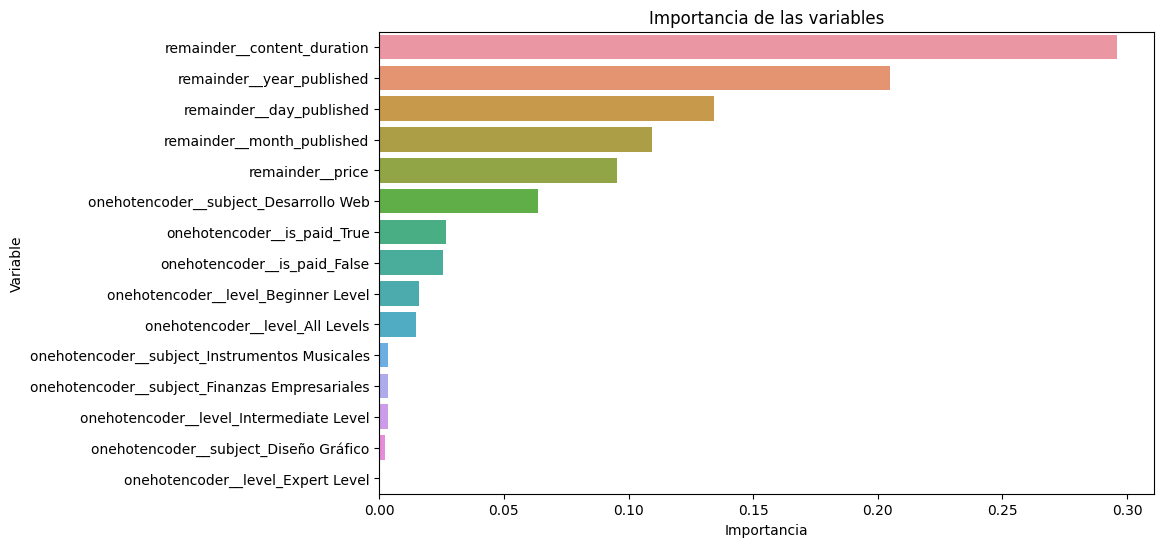

In [125]:
# se obtienen los nombres de las variables después de la transformación
feature_names = list(pipe.named_steps['columntransformer'].get_feature_names_out())

# se crea un DataFrame para facilitar la visualización
importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances,
}).sort_values('importance', ascending=False)

# se crea el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df, x='importance', y='feature')
plt.title('Importancia de las variables')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()


Las variables que el modelo pondera como más relevantes para el ordenamiento de los datos corresponden a la duración del curso y el año de publicación. En menor medidad, otras variables como el día y el mes de publicación, y el precio del curso resultan relevantes para el modelo. Entre las variables que fueron transformadas con el _one-hot encoder_, se destaca la categoría de Desarrollo Web correspondiente a la variable "subject".

# 4. Guardado de datasets transformados

In [126]:
dfcour_v2.to_csv('/content/drive/MyDrive/Henry/Datasets/Preprocesados/coursera_courses.csv', sep = ',' , index=False)
dfedx.to_csv('/content/drive/MyDrive/Henry/Datasets/Preprocesados/edx_courses.csv', sep = ',' , index=False)
dfude.to_csv('/content/drive/MyDrive/Henry/Datasets/Preprocesados/udemy_courses.csv', sep = ',' , index=False)